In [1]:
%load_ext autoreload
%autoreload 2

# Check Observables

We check the observables for different lattice sizes of the $\mathbb{Z}_2$ model changing the Hamiltonian parameter $g$.

$$ H = -g\sum_{i}\sigma_i^x -\frac{1}{g} \sum_{i}\square_i^{Plaquette} $$

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.utils import create_sequential_colors, binders_cumul

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

## Observables with different Bond Dimensions $\chi$

### 1. t'Hooft String

In [3]:
def plot_thooft_string_lattice(L, l, chis, h_i, h_f, npoints, lx, ly):
    hs = np.linspace(h_i,h_f,npoints)
    # hs = np.logspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"

    colors = create_sequential_colors(len(chis))
    strings = []
    for i, chi in enumerate(chis):
        string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        strings.append(string)
        plt.plot(hs, string, color=colors[i], label=f"$\chi={chi}$")
    plt.title(f"t'Hooft String of $Z_2$ direct lattice ${l}$x${L}$")
    plt.legend();
    plt.savefig(f"{parent_path}/figures/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")
    return strings

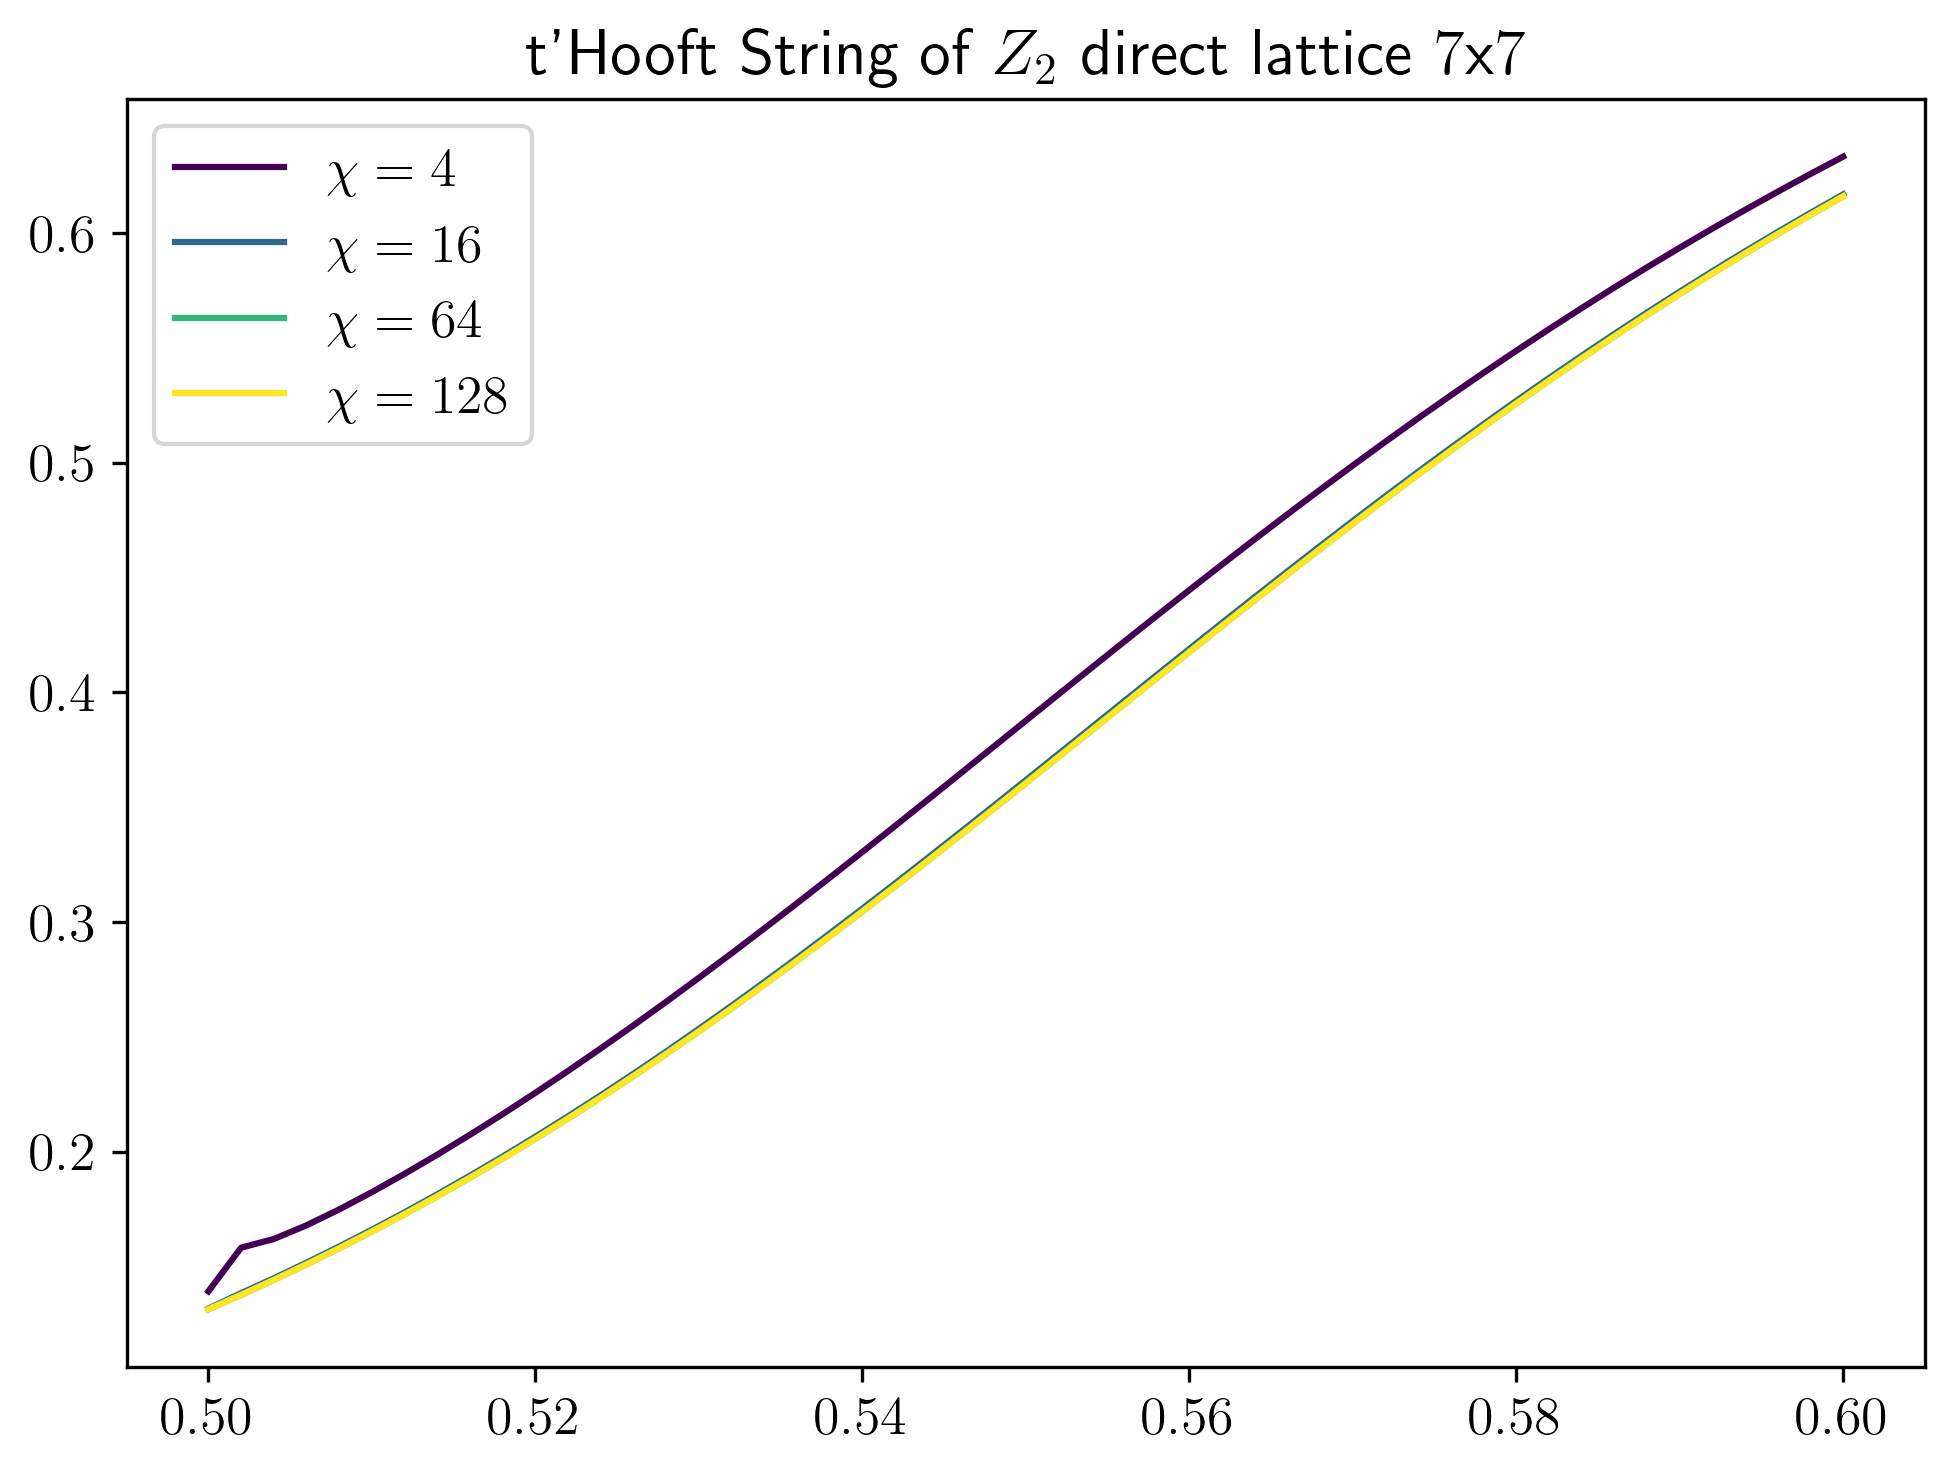

In [4]:
chis = [4,16,64,128]
L = 7
l = L
h_i = 0.5
h_f = 0.6
lx = 3
ly = 3
npoints = 51
strings = plot_thooft_string_lattice(L,l,chis,h_i,h_f,npoints,lx,ly)

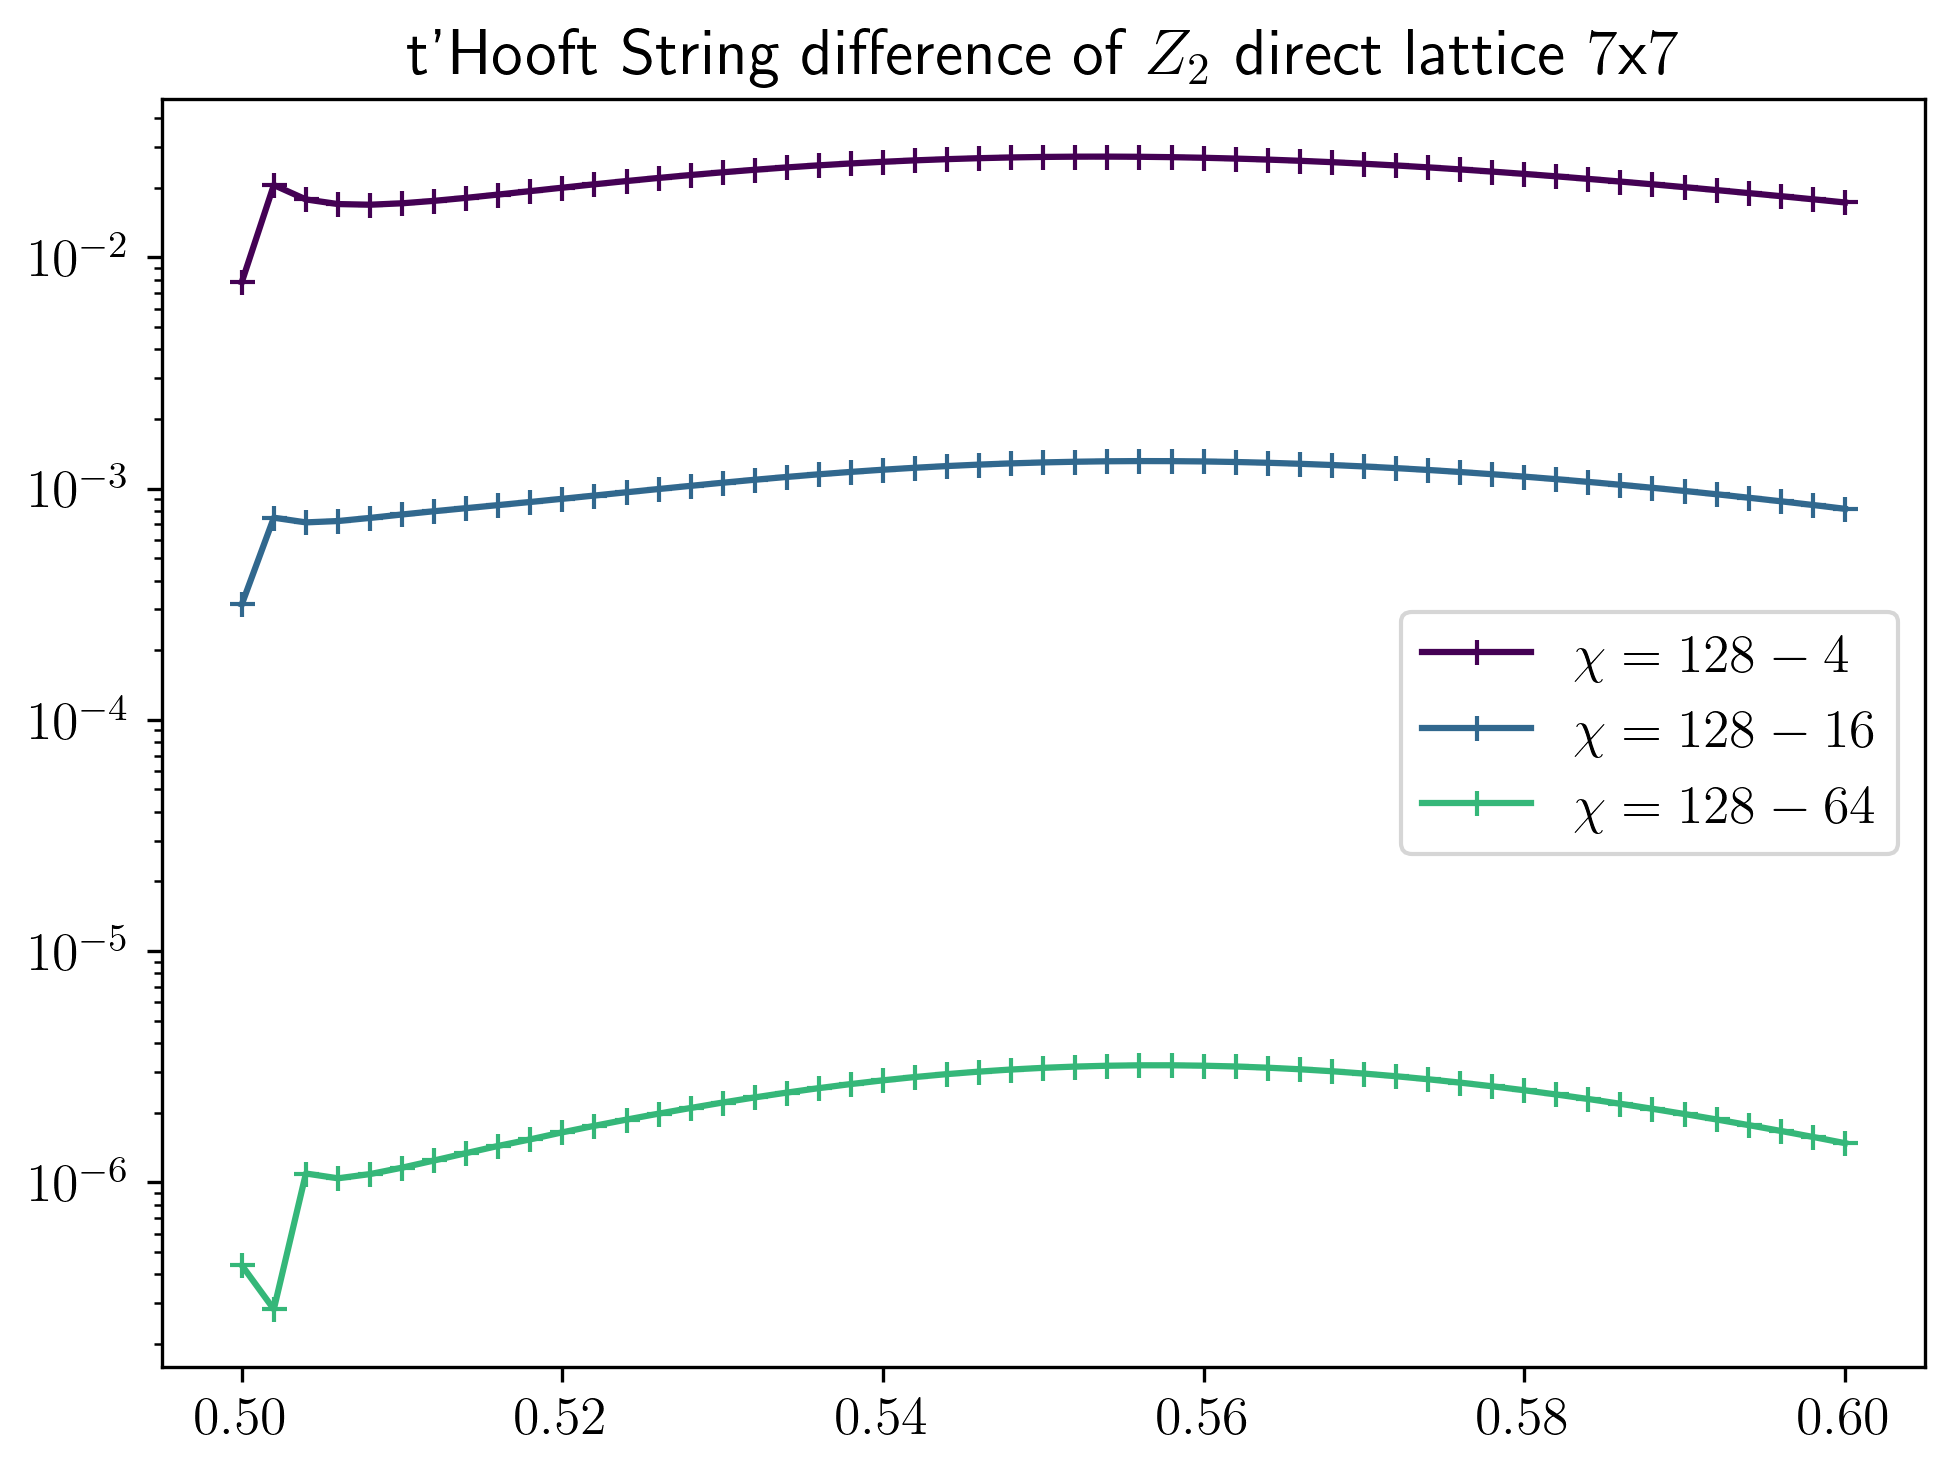

In [5]:
# plot difference between curves
hs = np.linspace(h_i,h_f,npoints)
parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"

cx = None
cy = None
if cx == None:
    sector = "vacuum_sector"
else:
    sector = f"{len(cx)}_particle(s)_sector"
colors = create_sequential_colors(len(chis))
for i, chi in enumerate(chis):
    if chi == chis[-1]:
        break
    else:
        diffs = np.abs(np.asarray(strings[-1])-np.asarray(strings[i]))
        plt.plot(hs, diffs, color=colors[i], marker='+', label=f"$\chi={chis[-1]}-{chis[i]}$")
plt.title(f"t'Hooft String difference of $Z_2$ direct lattice ${l}$x${L}$")
plt.yscale('log')
plt.legend();
plt.savefig(f"{parent_path}/figures/thooft/thooft_string_difference_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")


## Observables with different Lattice sizes

### 1. t'Hooft String

In [6]:
def plot_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys):
    hs = np.linspace(h_i,h_f,npoints)
    # hs = np.logspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"

    colors = create_sequential_colors(len(chis))
    i = 0
    for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
        l = L
        string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        plt.plot(hs, string, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$")
        i += 1

    plt.title(f"t'Hooft String of $Z_2$ different lattice sizes")
    plt.legend();
    plt.savefig(f"{parent_path}/figures/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")


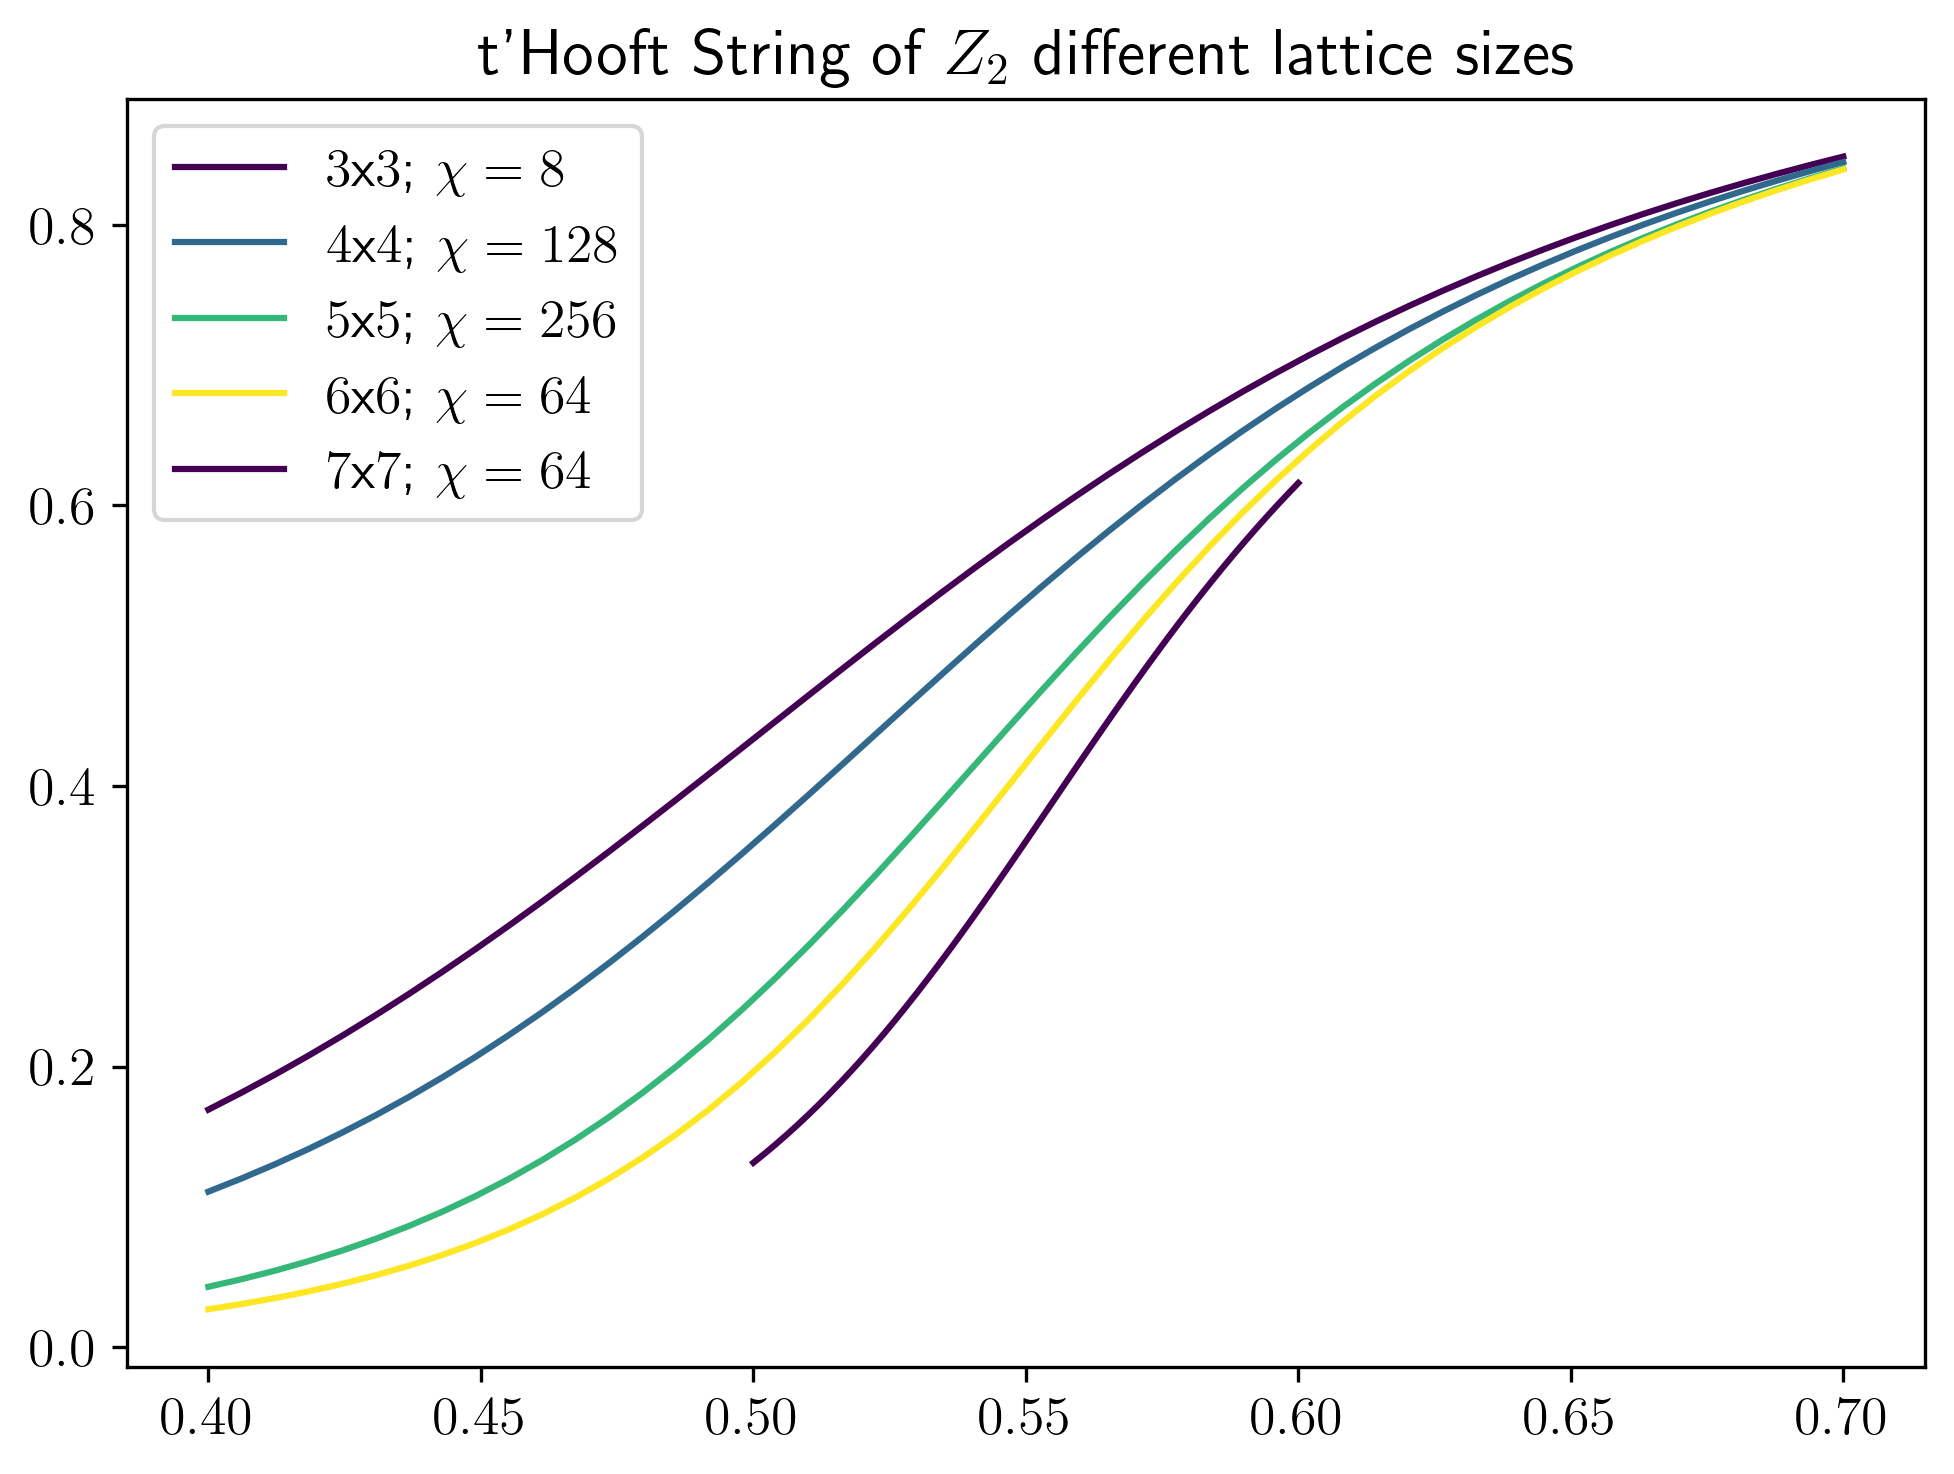

In [7]:
Ls = [3,4,5,6]
chis = [8,128,256,64]
h_i = 0.4
h_f = 0.7
lxs = [1,2,2,2]
lys = [1,1,2,2]
npoints = 50
plot_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys)
Ls = [7]
chis = [64]
h_i = 0.5
h_f = 0.6
lxs = [3]
lys = [3]
npoints = 51
plot_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys)

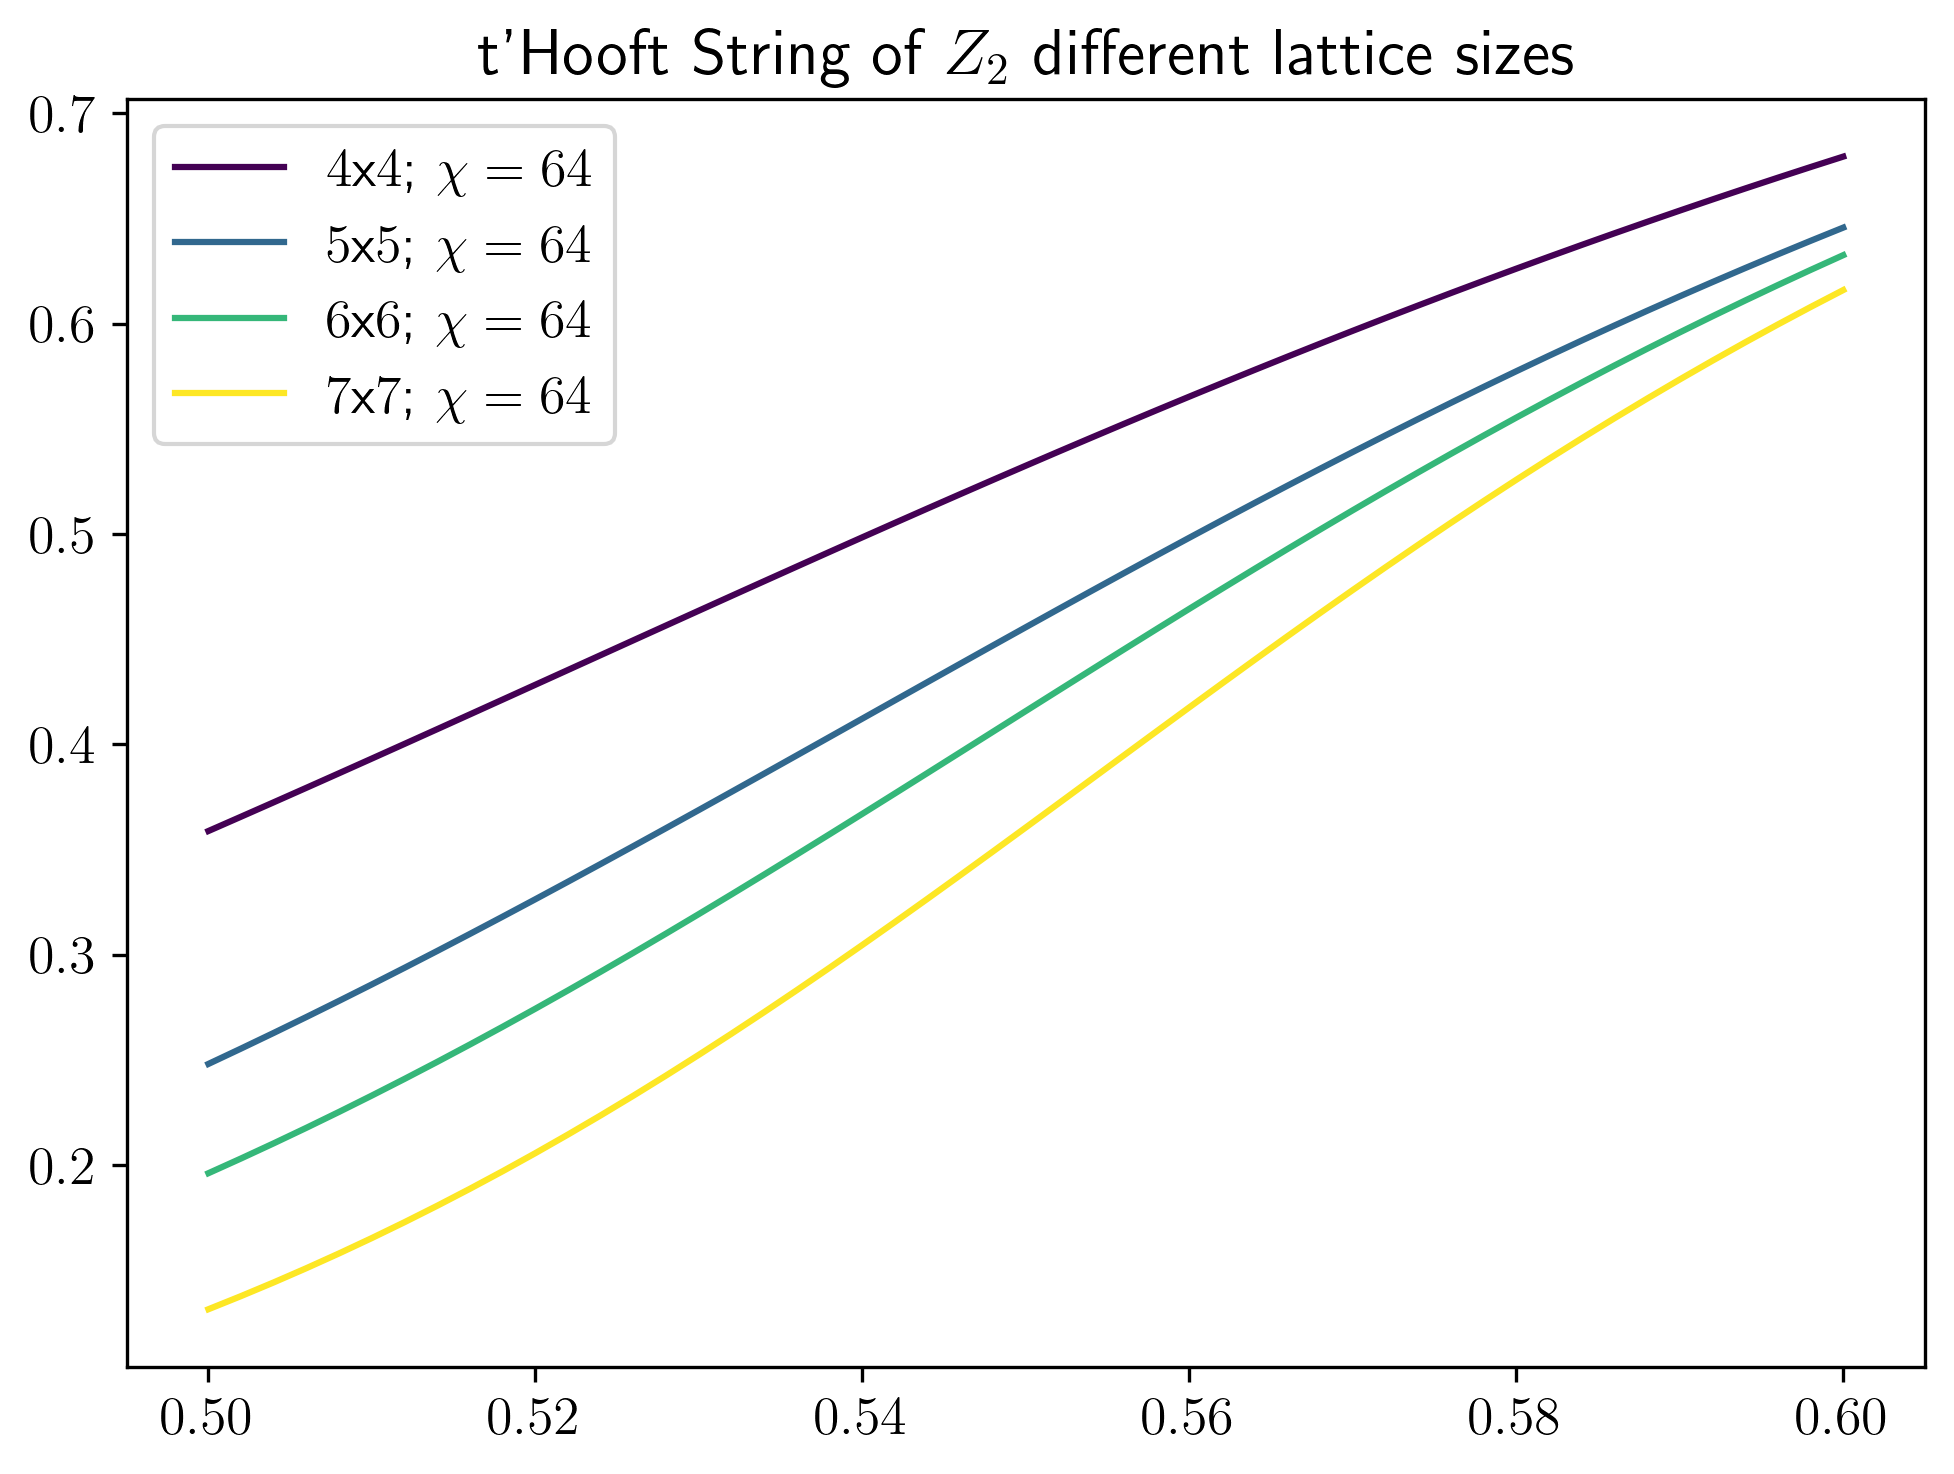

In [8]:
Ls = [4,5,6,7]
chis = [64,64,64,64]
h_i = 0.5
h_f = 0.6
lxs = [1,2,2,3]
lys = [1,2,2,3]
npoints = 51
plot_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys)

### Extracting $\gamma$ and $\nu$ from $g_c$ with a $Log$ law

We know that:
$$ \frac{dM}{dg}|_{h_{max}} \sim |g_c(L)-g_c(\infty)|^{-\gamma} \sim L^{\frac{\gamma}{\nu}}$$
where the derivative of the magnetization represents the susceptibility and the $\gamma, \nu$ *critical exponents* can be found with two formulas. 
1. In one formula we use the experimental value of $g_c^{exp}(\infty)=0.555$ extracted from the entropy maxima and the critical point for finite sizes $L$ to find $\nu$:
$$ |g_c(L)-g_c^{exp}(\infty)|^{-\gamma (\frac{-\nu}{-\nu})}=cL^{\frac{\gamma}{\nu}} $$
$$ \log(|g_c(L)-g_c^{exp}(\infty)|)=c + \frac{1}{\nu} \log(\frac{1}{L}) $$
2. Now we use the $\nu$ just found to get $\gamma$:
$$ \log(\frac{dM}{dg}|_{h_{max}}) = \log(cL^{\frac{\gamma}{\nu}})= \log(c)+\frac{\gamma}{\nu}\log(L)$$

In [9]:
def plot_derivative_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lxy):
    colors = create_sequential_colors(len(chis))
    i = 0
    max_vals = []
    x_vals = []
    hs = np.linspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"

    for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
        l = L
        string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        d_string_dh = np.gradient(string, hs)
        idx_max = np.argmax(d_string_dh)
        max_vals.append(np.max(d_string_dh))
        x_vals.append(hs[idx_max])
        plt.plot(hs, string, color=colors[i], linestyle='--', label=f"${l}$x${L}$; $\chi={chi}$")
        plt.plot(hs, d_string_dh, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$ Der")
        i += 1
    plt.scatter(x_vals, max_vals, marker='o', facecolors="white", edgecolors="red")
    plt.title(f"Derivative of t'Hooft String of $Z_2$ different lattice sizes")
    plt.savefig(f"{parent_path}/figures/thooft/thooft_string_derivative_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")

    plt.legend();
    return max_vals, x_vals, d_string_dh

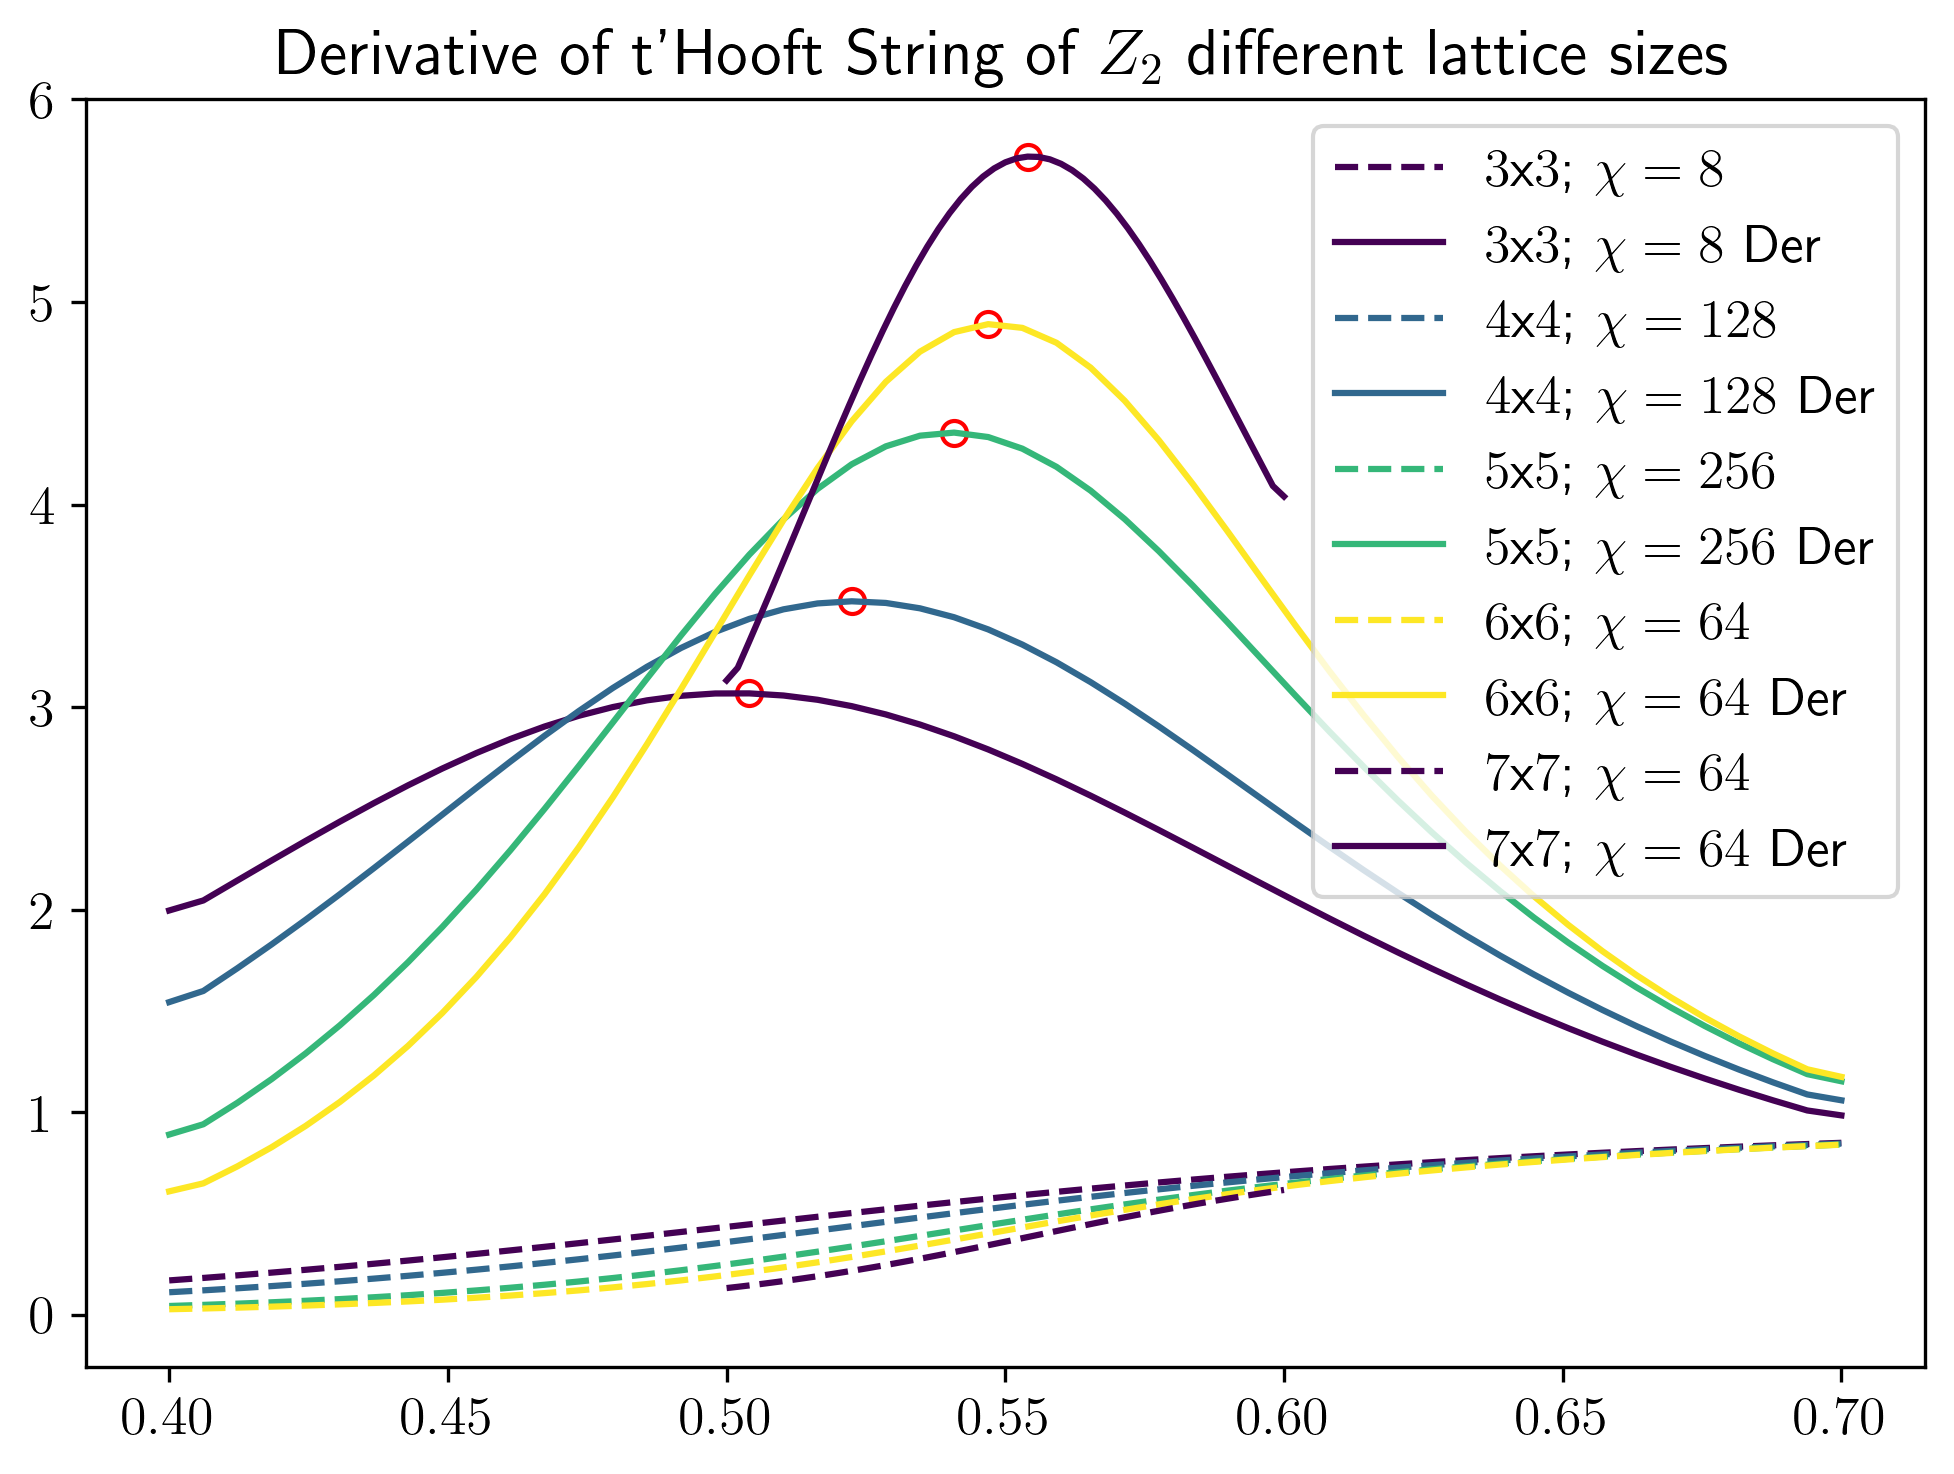

In [10]:
Ls1 = [3,4,5,6]
chis = [8,128,256,64]
h_i = 0.4
h_f = 0.7
lxs = [1,2,2,2]
lys = [1,1,2,2]
npoints = 50
max_vals_1, x_vals_1,_ = plot_derivative_thooft_string_lattices(Ls1, chis, h_i, h_f, npoints, lxs, lys)
Ls2 = [7]
chis = [64]
h_i = 0.5
h_f = 0.6
lxs = [3]
lys = [3]
npoints = 51
max_vals_2, x_vals_2,_ = plot_derivative_thooft_string_lattices(Ls2, chis, h_i, h_f, npoints, lxs, lys)

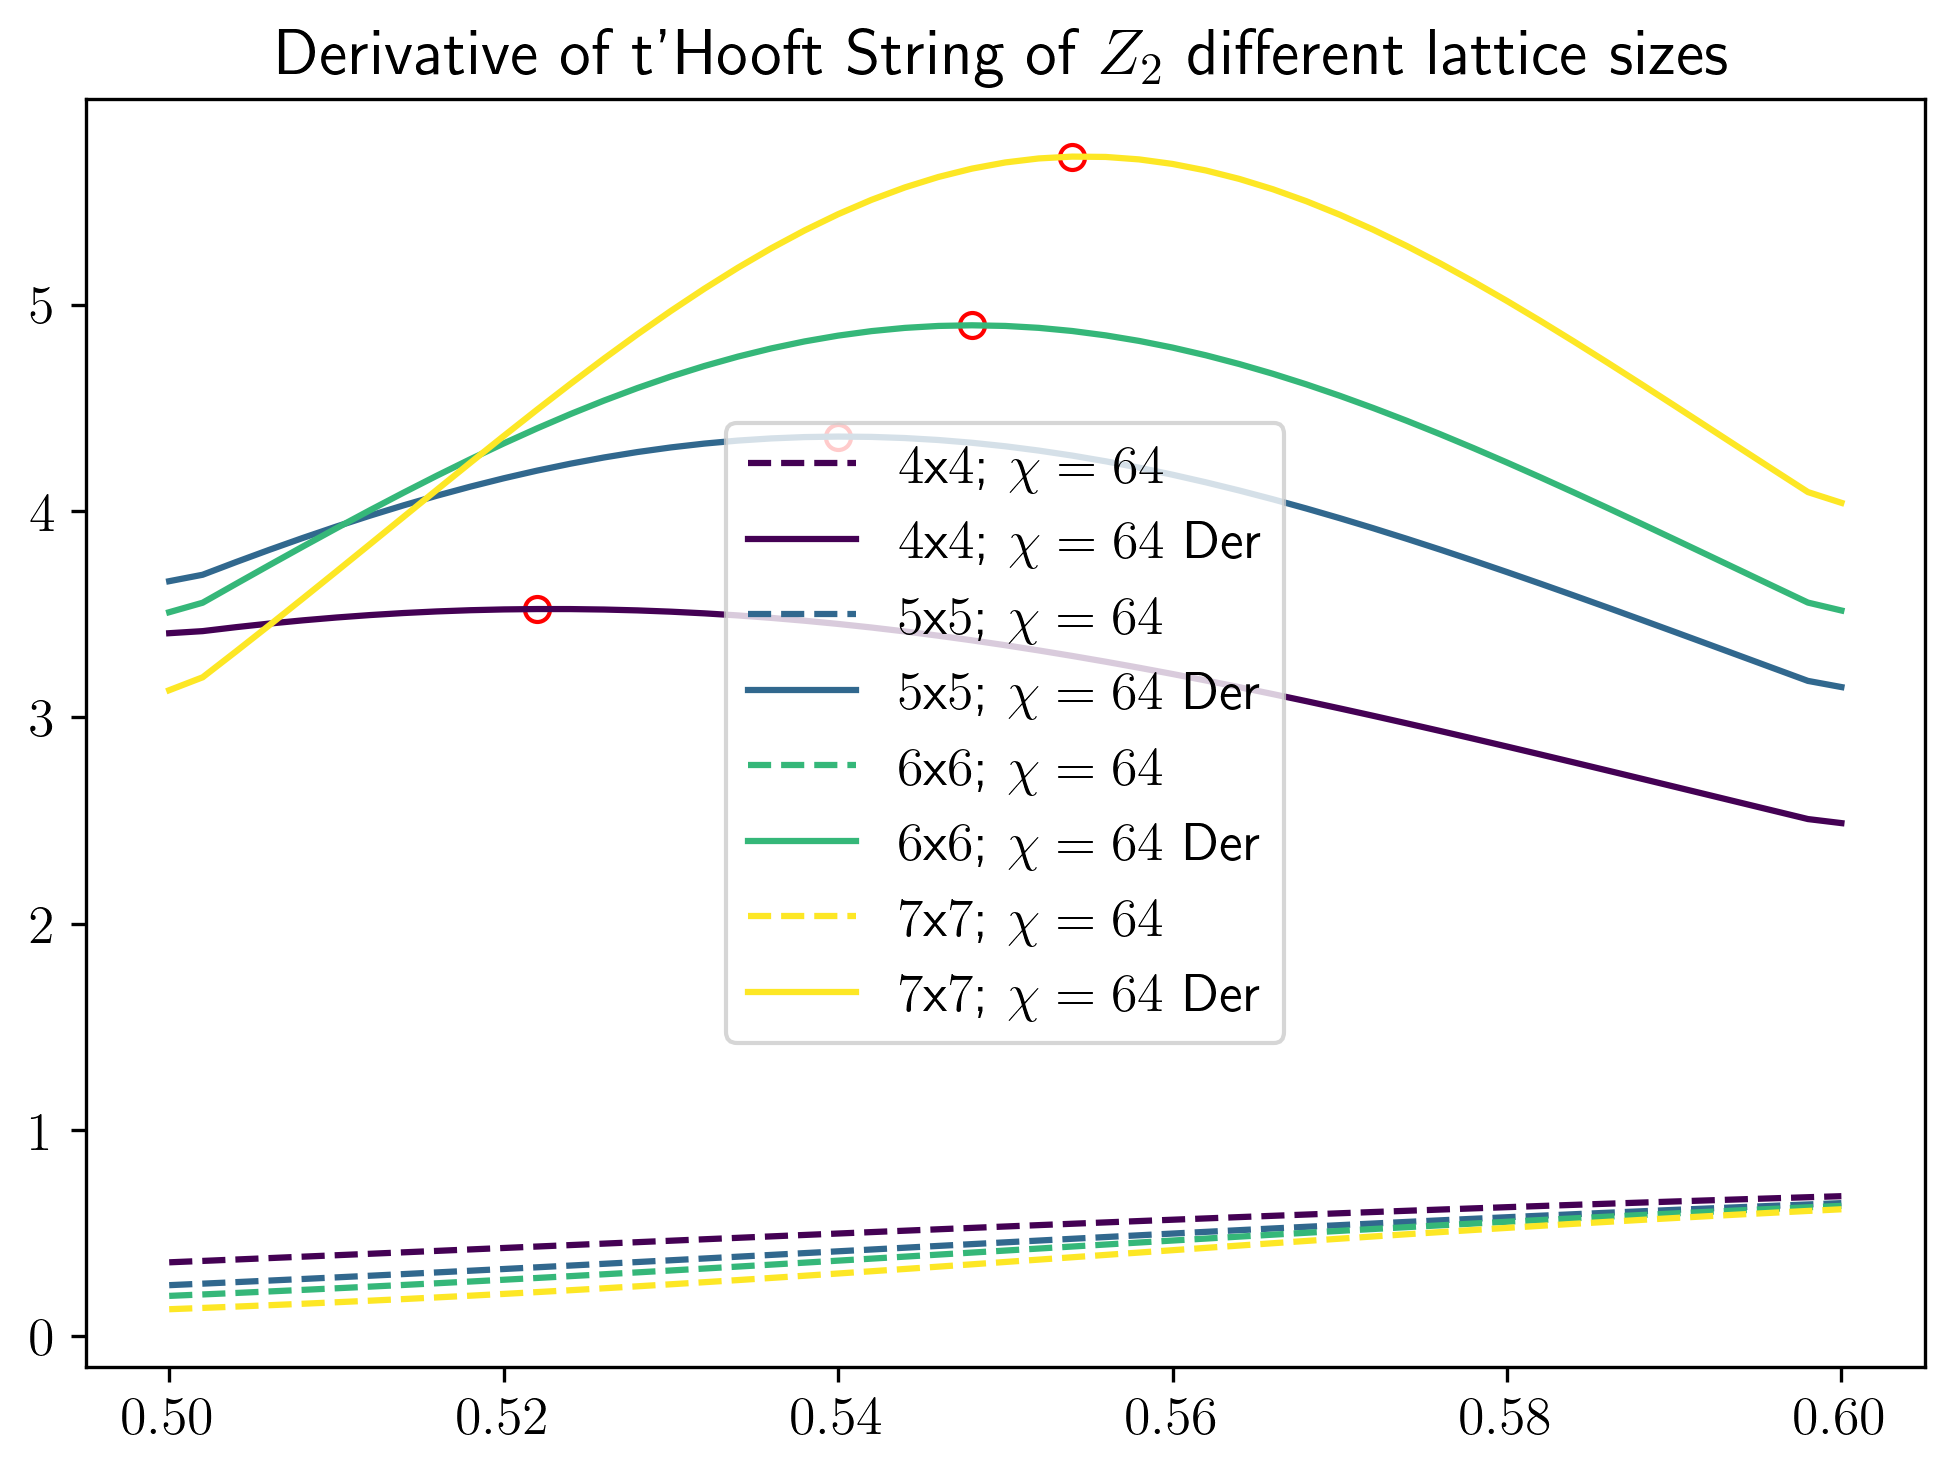

In [11]:
Ls2 = [4,5,6,7]
chis = [64]*4
h_i = 0.5
h_f = 0.6
lxs = [1,2,2,3]
lys = [1,2,2,3]
npoints = 51
max_vals_2, x_vals_2, susceptibility = plot_derivative_thooft_string_lattices(Ls2, chis, h_i, h_f, npoints, lxs, lys)

### Data collapse

In [ ]:
print(x_vals_1, x_vals_2)
x_vals = x_vals_1 + x_vals_2
max_vals = max_vals_1 + max_vals_2
Ls = Ls1 + Ls2
print(x_vals)

[0.5040816326530613, 0.5224489795918368, 0.5408163265306123, 0.5469387755102041] [0.554]
[0.5040816326530613, 0.5224489795918368, 0.5408163265306123, 0.5469387755102041, 0.554]


In [ ]:
Ls.pop(0)
x_vals.pop(0)
max_vals.pop(0)

3.5222492432091457

0.5859234231622725


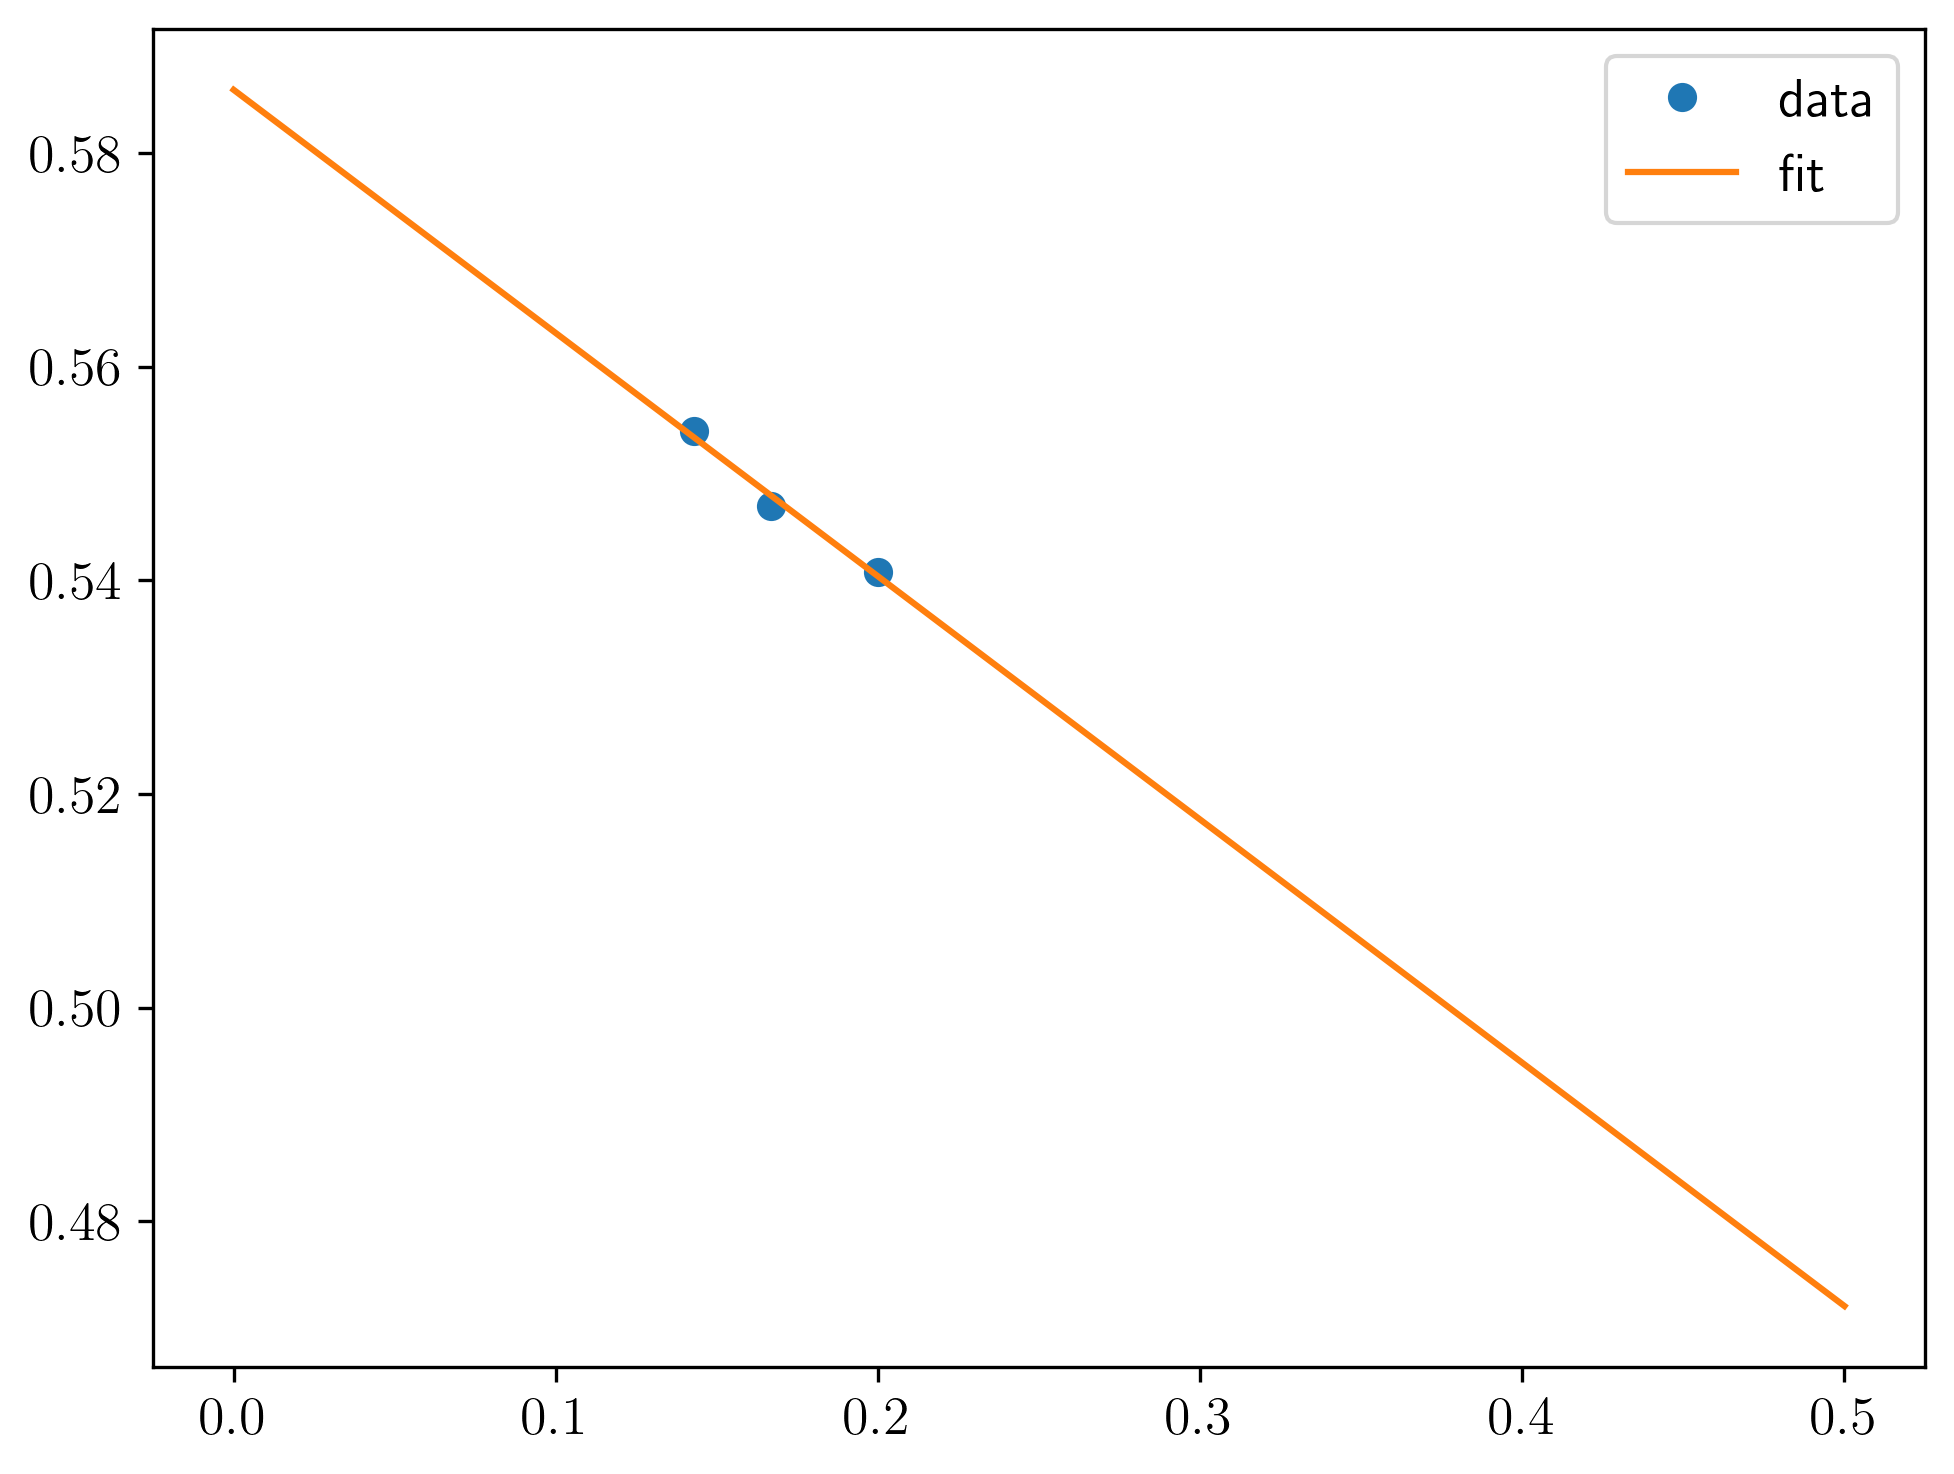

In [ ]:
def lin_law(x,a,b):
    return a*x+b
Ls_inv = 1/np.asarray(Ls)
p, c = curve_fit(lin_law, Ls_inv, x_vals)
xs = np.linspace(0,0.5)
plt.plot(Ls_inv, x_vals, 'o', label="data")
plt.plot(xs, lin_law(xs, p[0], p[1]), label="fit")
plt.legend()
print(lin_law(0, p[0], p[1]))

In [ ]:
def lin_law(x,a,b):
    return a*x+b

def power_law(L, a, b, c):
    return a + b*(L**c)

# find nu and gc
x_data = Ls2
y_data = x_vals_2
popt_power, copt_power = curve_fit(power_law, x_data, y_data, maxfev=5000)
print(f"the nu: {-1/popt_power[2]}")
print(f"the gc_pow: {popt_power[0]}")

# find nu
x_data = np.log(np.abs(1/np.asarray(Ls)))
h_th = 1/np.sqrt(3.044)
print(f"the gc_th: {h_th}")

y_data = np.log(np.abs(np.asarray(x_vals_2)-h_th))
popt_log_th, copt_log_th = curve_fit(lin_law, x_data, y_data)
print(f"3: The nu with g_th is: {1/popt_log_th[0]}")

y_data = np.log(np.abs(np.asarray(x_vals_2)-0.56))
popt_log_pow, copt_log_pow = curve_fit(lin_law, x_data, y_data)
print(f"3: The nu with g_pow is: {1/popt_log_pow[0]}")

# first method
x_data = np.log(np.abs(np.asarray(x_vals)-h_th))
y_data = np.log(np.abs(max_vals))

popt_log_1, copt_log_1 = curve_fit(lin_law, x_data, y_data)
print(f"The gamma is: {-popt_log_1[0]}")

# second method
x_data = np.log(1/np.asarray(Ls))
y_data = np.log(np.abs(max_vals))

popt_log_2, copt_log_2 = curve_fit(lin_law, x_data, y_data)
print(f"The gamma is: {popt_log_2[0]*(-1/popt_power[2])}")

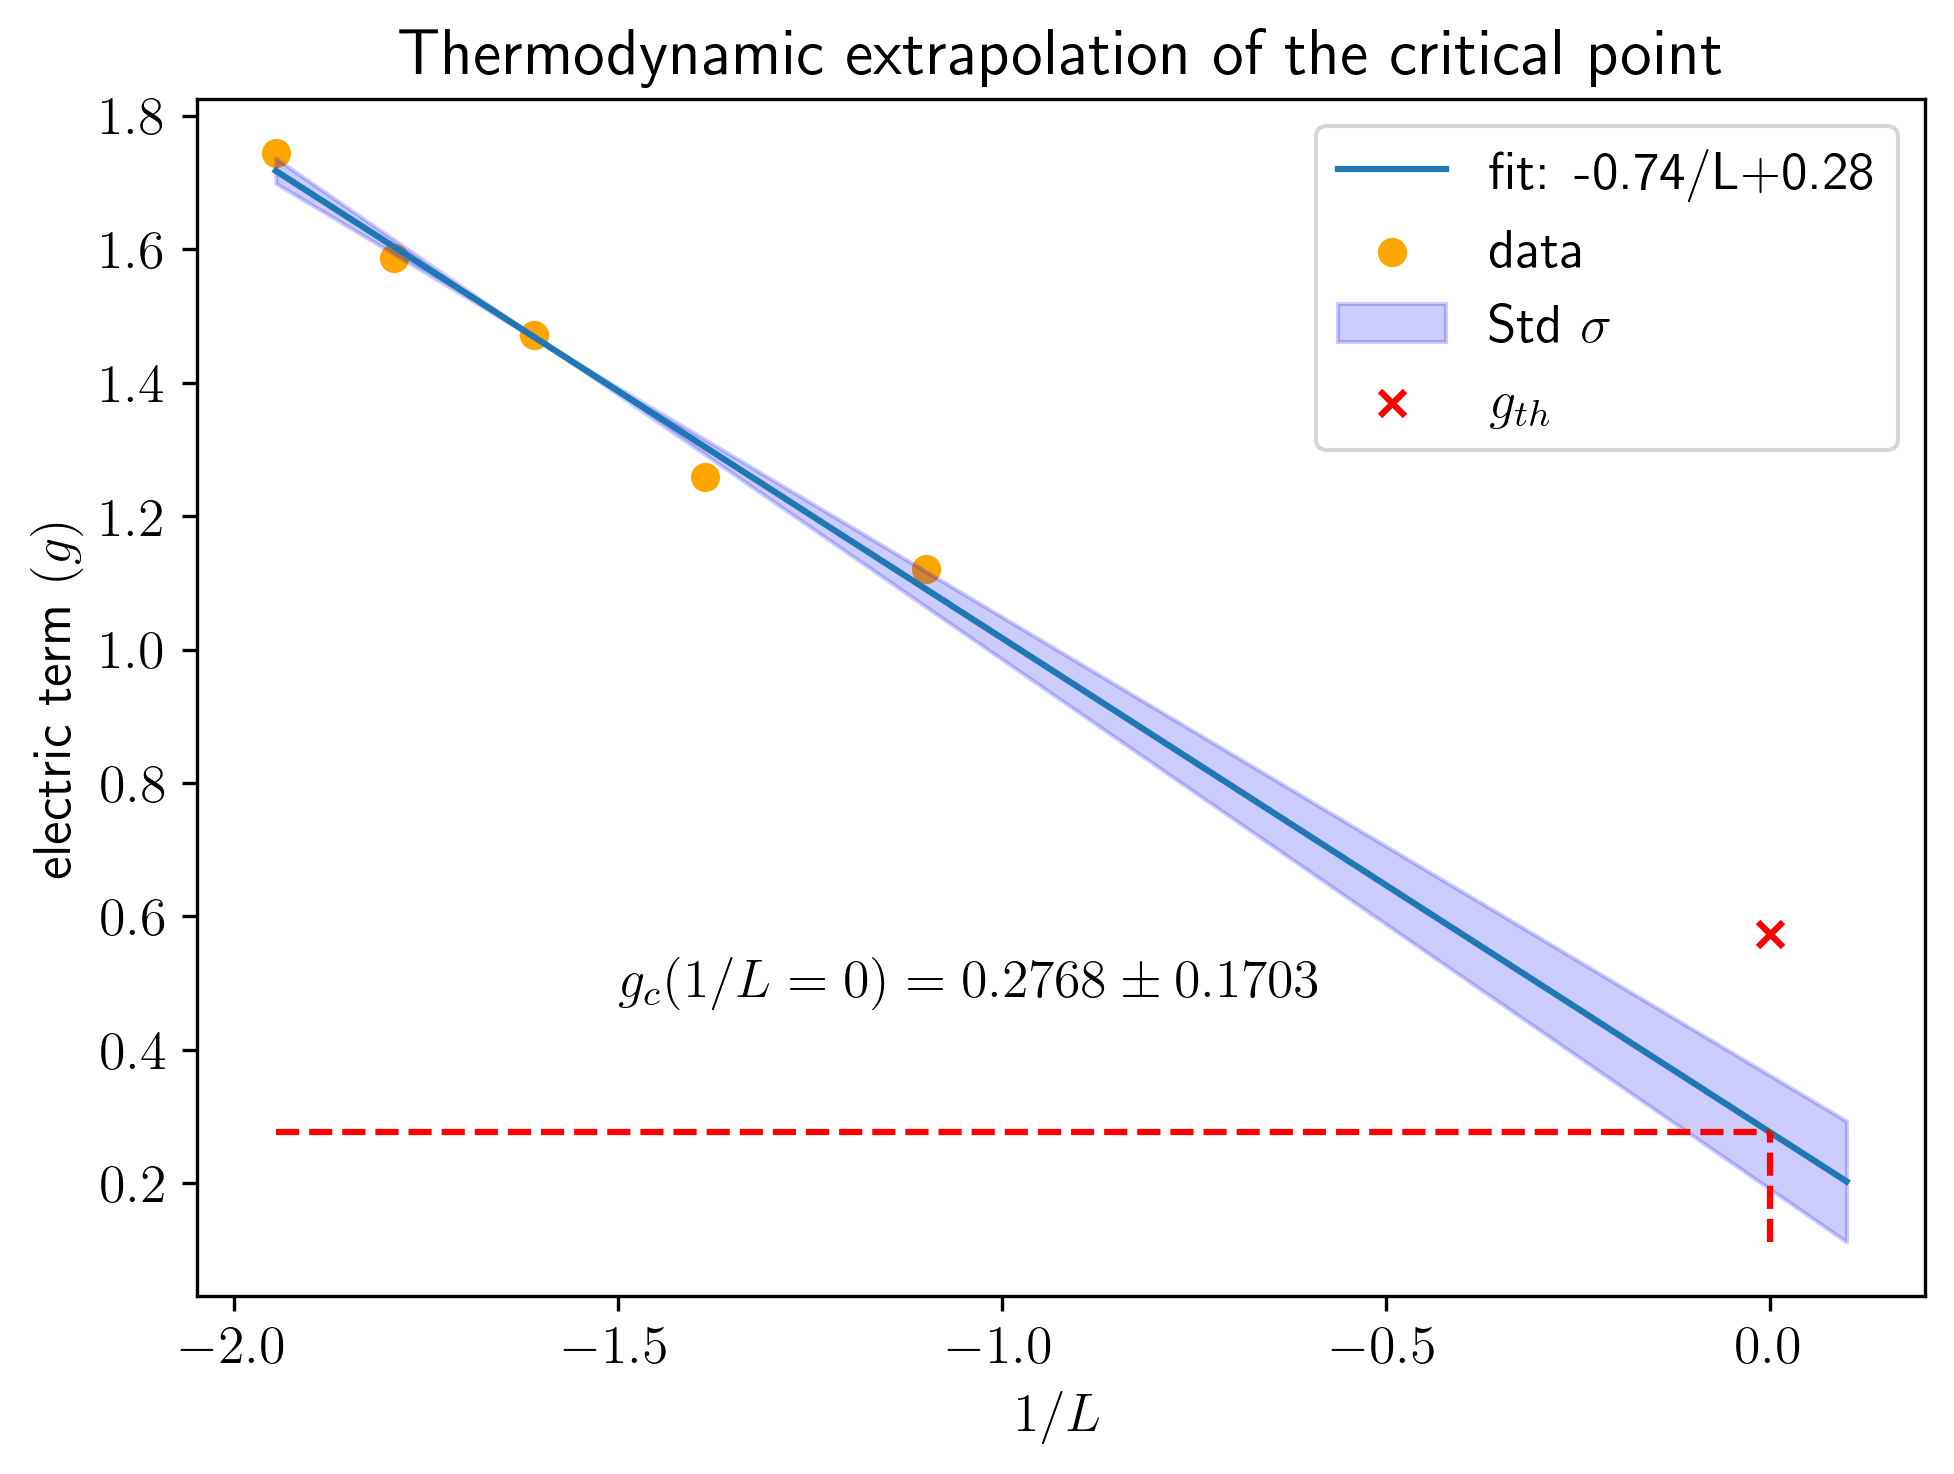

In [ ]:
entr_max = []
idx_max = []
Ls_inv = [1/3,1/4,1/5,1/6,1/7]
g_th = 1/np.sqrt(3.044)

x_data = np.log(np.abs(Ls_inv))
y_data = np.log(np.abs(max_vals))

p_opt, c_opt = curve_fit(lin_law, x_data, y_data)

xs = np.linspace(x_data[-1],0.1,50)
y_fit = lin_law(xs, p_opt[0], p_opt[1])
err = np.sqrt(np.diag(c_opt))
y_err_plus = lin_law(xs, p_opt[0]+err[0], p_opt[1]+err[1])
y_err_minus = lin_law(xs, p_opt[0]-err[0], p_opt[1]-err[1])
plt.title("Thermodynamic extrapolation of the critical point")
plt.plot(xs, y_fit, label=f'fit: {round(p_opt[0],2)}/L+{round(p_opt[1],2)}')
plt.scatter(x_data, y_data, color='orange', label='data')
h_c = round(lin_law(x=0,a=p_opt[0],b=p_opt[1]),4)
h_c_err_plus = round(lin_law(x=0,a=p_opt[0]+err[0],b=p_opt[1]+err[1]),4)
h_c_err_minus = round(lin_law(x=0,a=p_opt[0]-err[0],b=p_opt[1]-err[1]),4)
h_c_err = round(h_c_err_plus - h_c_err_minus, 4)
plt.text(x=-1.5, y=0.48, s=f"$g_c(1/L=0)={h_c}\pm{h_c_err}$")
plt.hlines(y=h_c, xmin=xs[0], xmax=0, linestyles='--', colors='red')
plt.vlines(x=0, ymin=y_err_minus[-1], ymax=h_c, linestyles='--', colors='red')
plt.fill_between(xs, y_err_minus, y_err_plus, color='blue', alpha=0.2, label='Std $\sigma$')
plt.scatter([0], [g_th], marker='x', color='red', label='$g_{th}$')
plt.xlabel("$1/L$")
plt.ylabel("electric term $(g)$")

plt.legend()
plt.show();

In [ ]:
p_opt

array([-0.74032456,  0.27678827])

The slope of the curve is 3.579900081261434
So that nu is 0.2793374053187636
The th value is 0.629971(4)


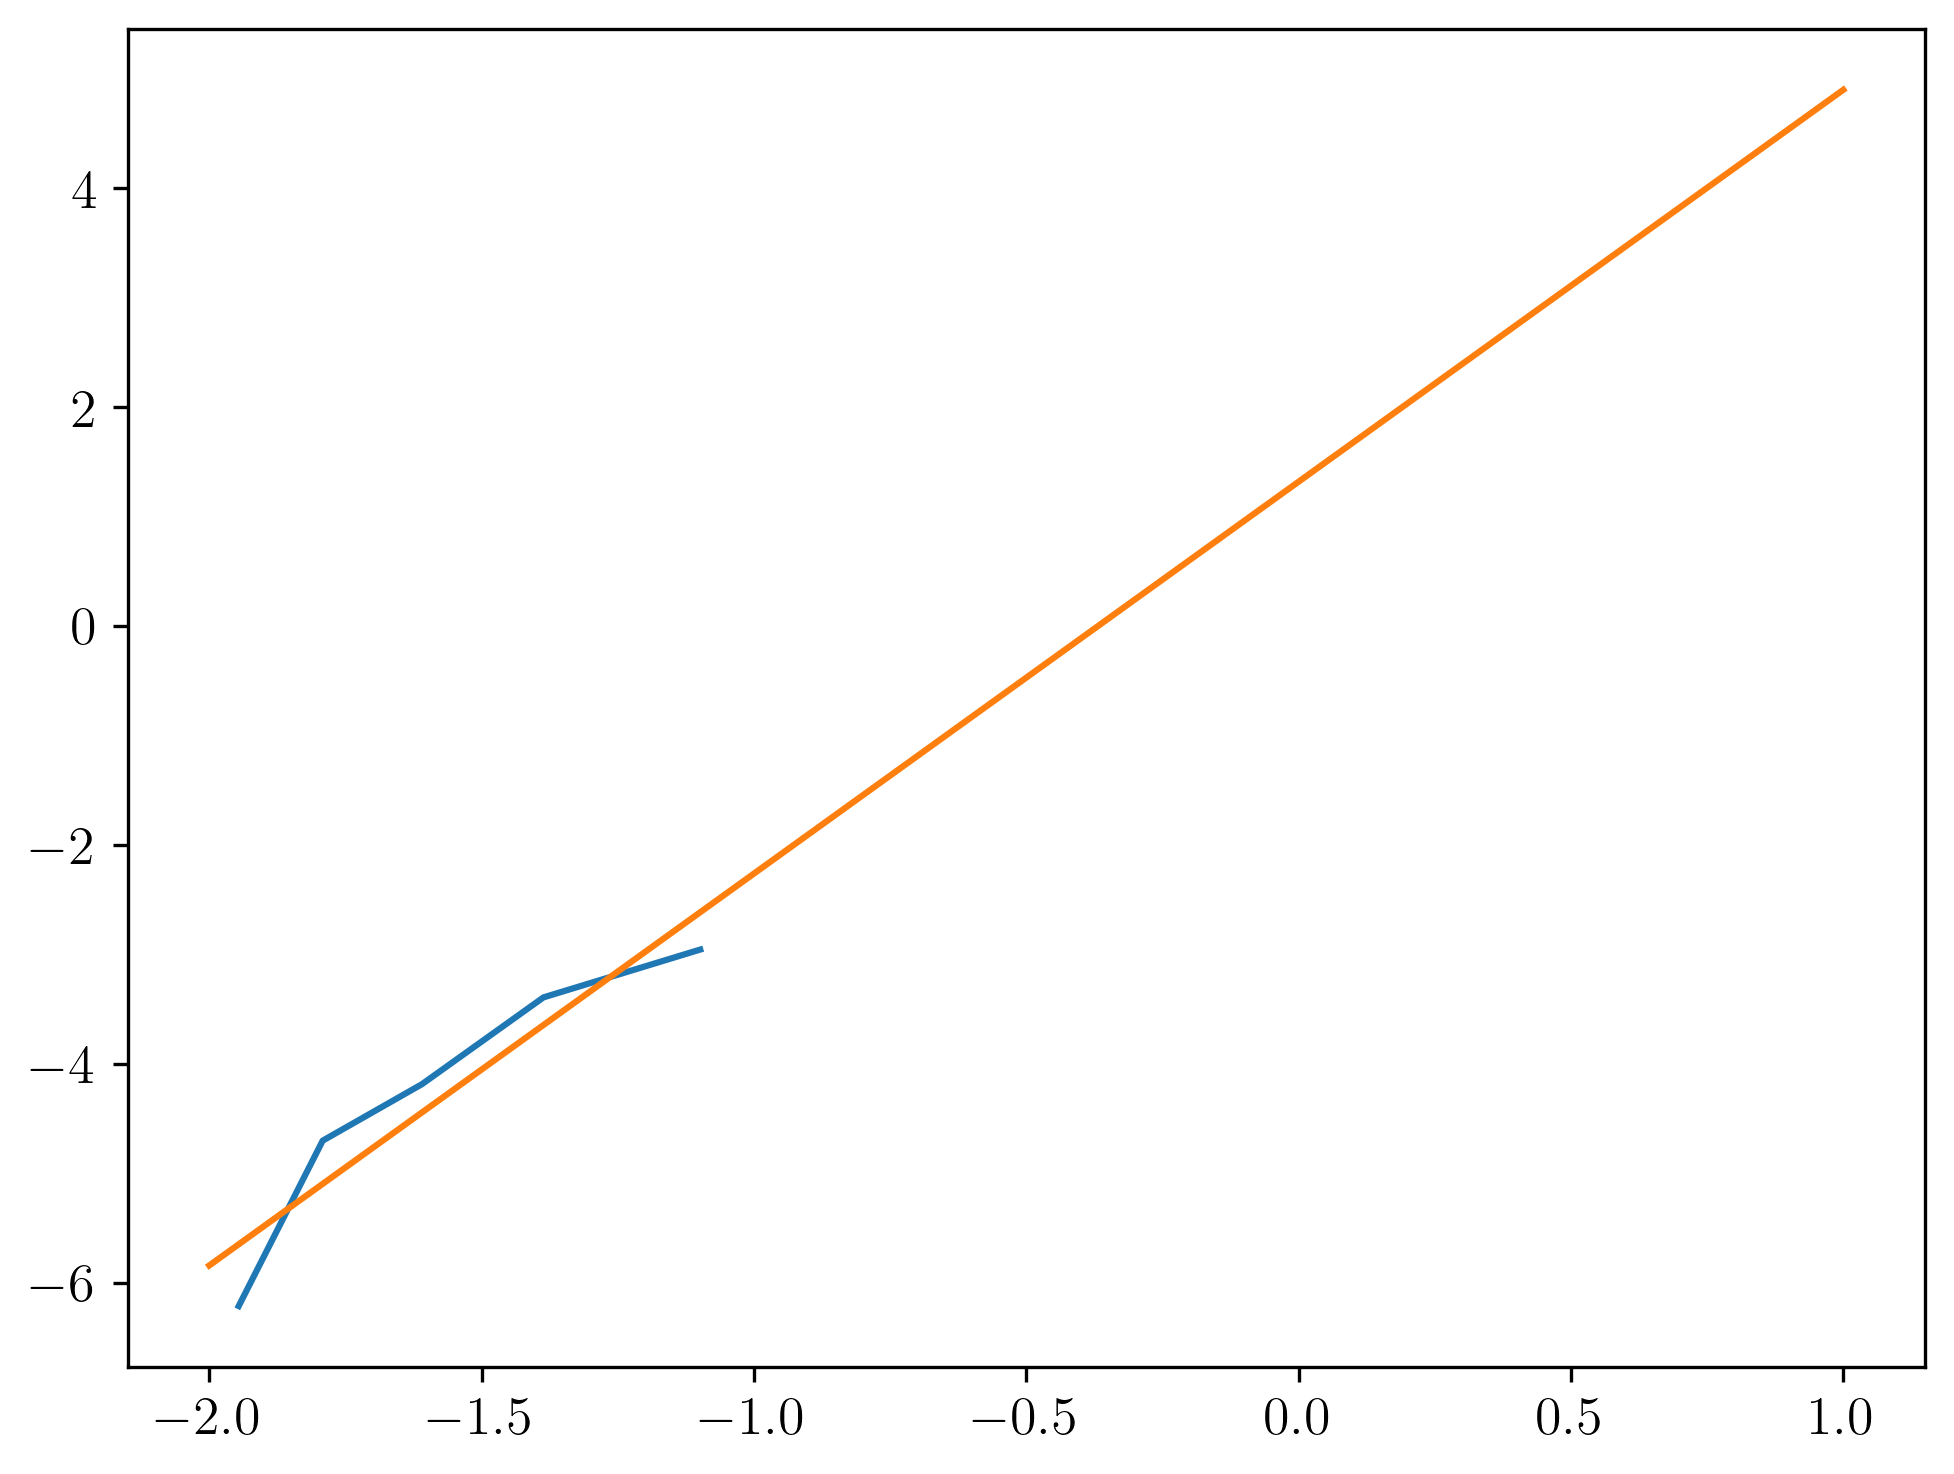

In [ ]:
y_data = np.log(np.abs(np.asarray(x_vals)-0.556))

x_data = np.log(Ls_inv)
x_data

plin, _ = curve_fit(lin_law, xdata=x_data, ydata=y_data)
xs = np.linspace(-2, 1, 50)
plt.plot(x_data,y_data)
plt.plot(xs, lin_law(xs, plin[0], plin[1]))
print(f"The slope of the curve is {plin[0]}")
print(f"So that nu is {1/plin[0]}")
print(f"The th value is 0.629971(4)")

### 2. Binder's Cumulant

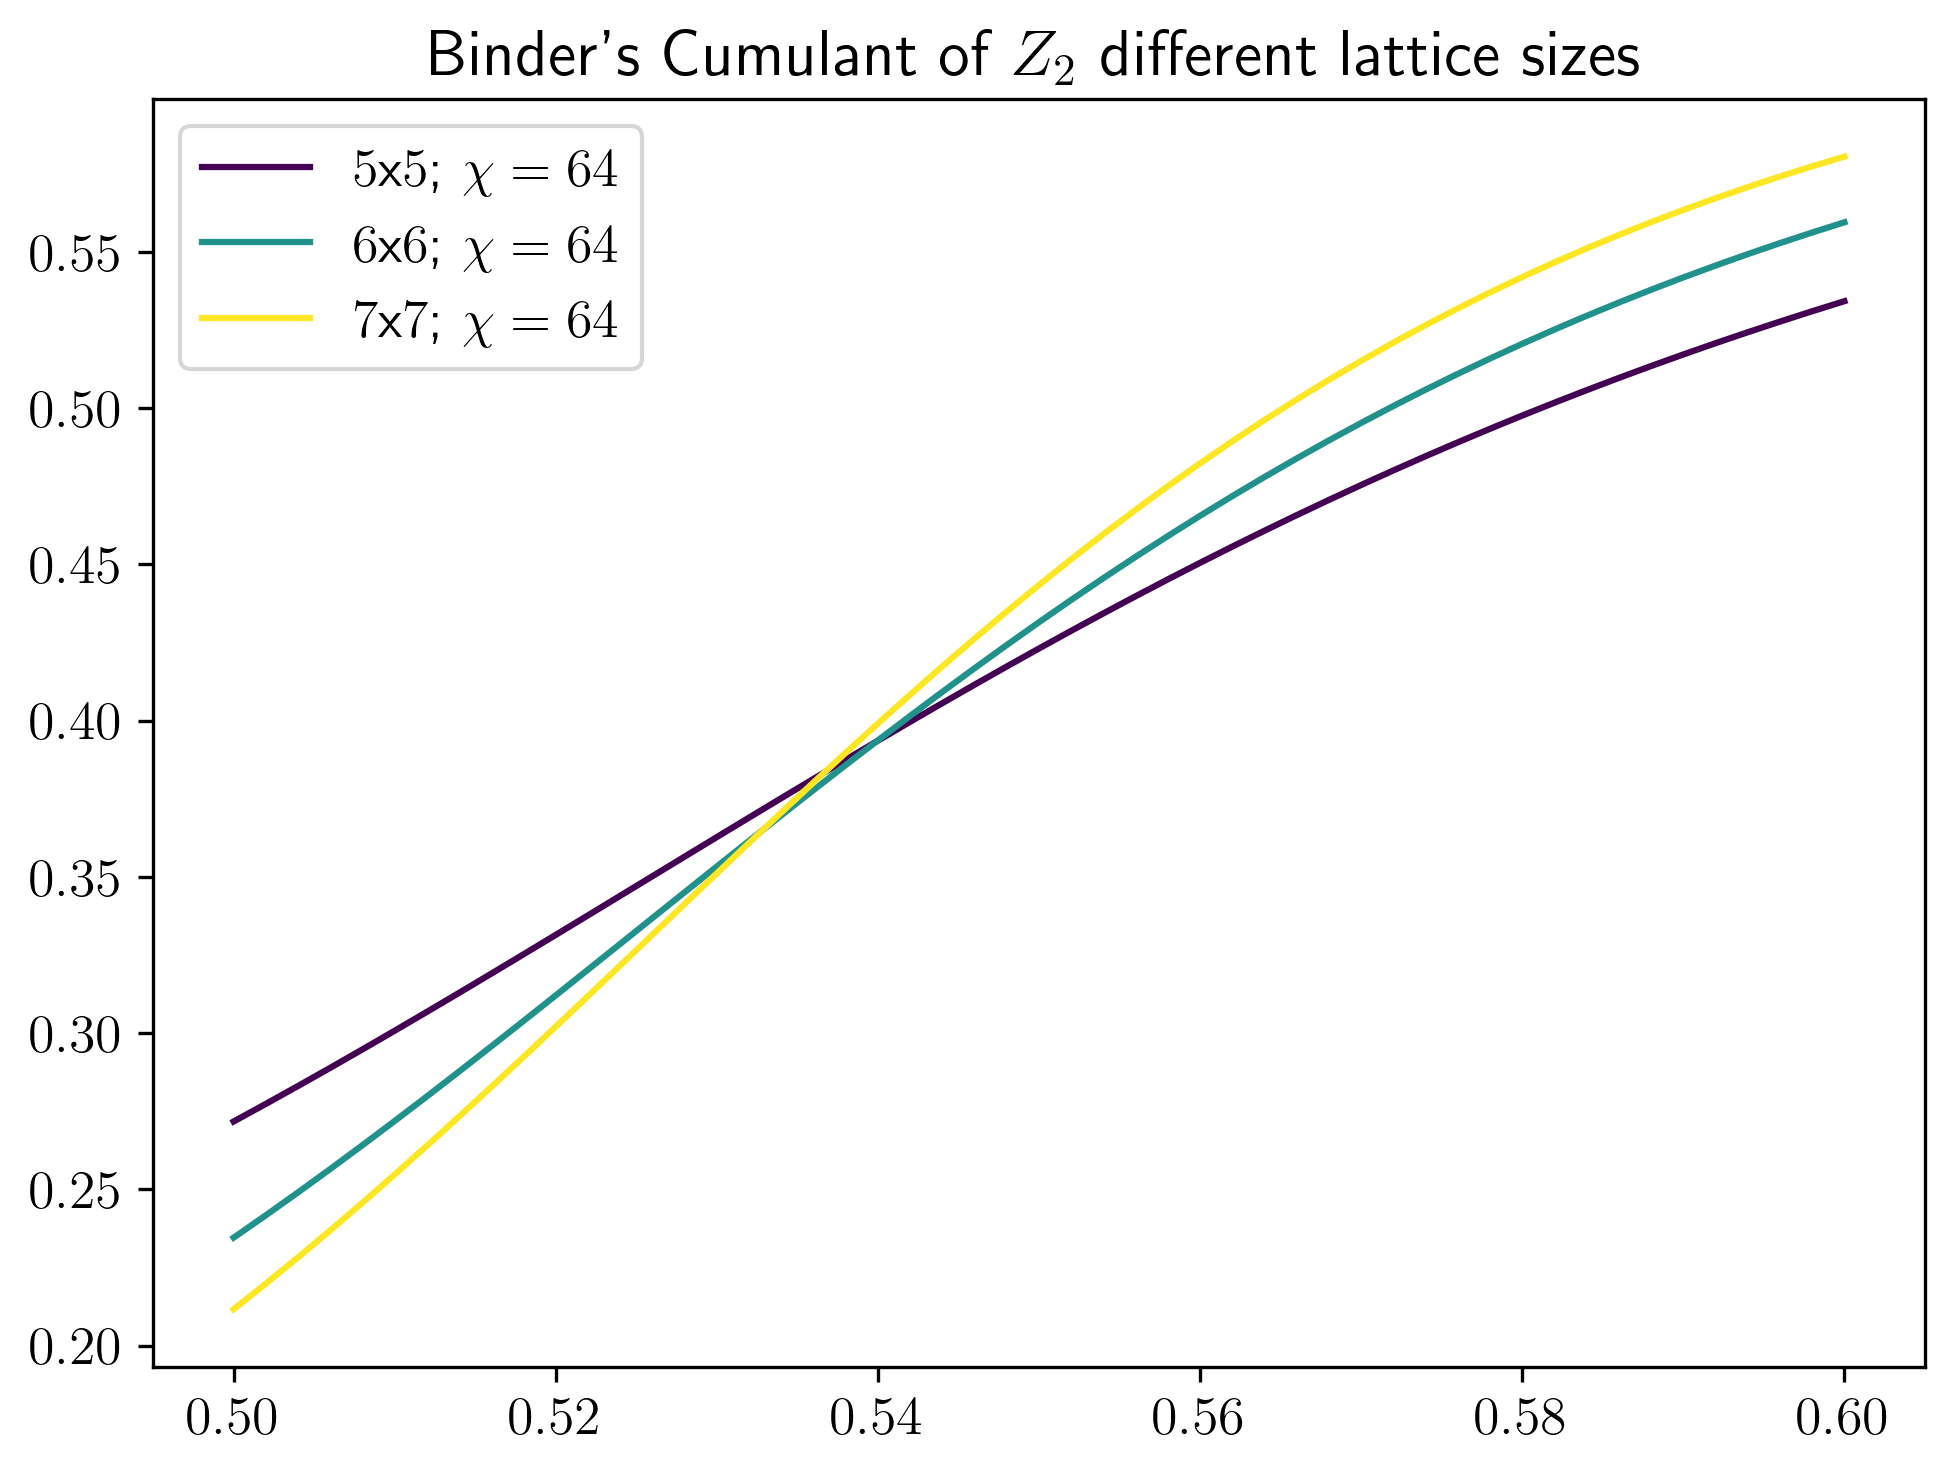

In [ ]:
Ls = [5,6,7]
chis = [64,64,64]
h_i = 0.5
h_f = 0.6
npoints = 51
hs = np.linspace(h_i,h_f,npoints)
# hs = np.logspace(h_i,h_f,npoints)
cx = None
cy = None
if cx == None:
    sector = "vacuum_sector"
else:
    sector = f"{len(cx)}_particle(s)_sector"
parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"

colors = create_sequential_colors(len(chis))
i = 0
for L, chi in zip(Ls, chis):
    l = L
    string2 = np.load("/Users/fradm/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_4x4_vacuum_sector_None-None_h_0.4-0.7_delta_50_chi_128.npy")
    string2 = np.load(f"{parent_path}/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    string4 = np.load(f"{parent_path}/results/mag_data/dual_mag_fourth_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    bc = binders_cumul(fourth_m=string4, sm=string2)
    plt.plot(hs, bc, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$")
    i += 1

plt.title(f"Binder's Cumulant of $Z_2$ different lattice sizes")
plt.legend();
plt.savefig(f"{parent_path}/figures/critical_exponents/binders_cumulant_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")


### 3. Wilson Loop

In [27]:
def plot_wilson_loop(Ls, chis, h_i, h_f, npoints, lxs, lys):
    hs = np.linspace(h_i,h_f,npoints)
    # hs = np.logspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"

    colors = create_sequential_colors(len(chis))
    i = 0
    for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
        l = L
        loop = np.loadtxt(f"{parent_path}/results/wilson_loops/wilson_loop_first_moment_{lx}-{ly}_Z2_dual_direct_lattice_{l}x{L}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}")
        plt.plot(hs, loop, color=colors[i], label=f"$W_{i+1}$")
        i += 1

    plt.title(f"Wilson Loop of $Z_2$ different plaquette sizes")
    plt.legend();
    plt.savefig(f"{parent_path}/figures/wilson_loops/wilson_loop_first_moment_{lx}-{ly}_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")

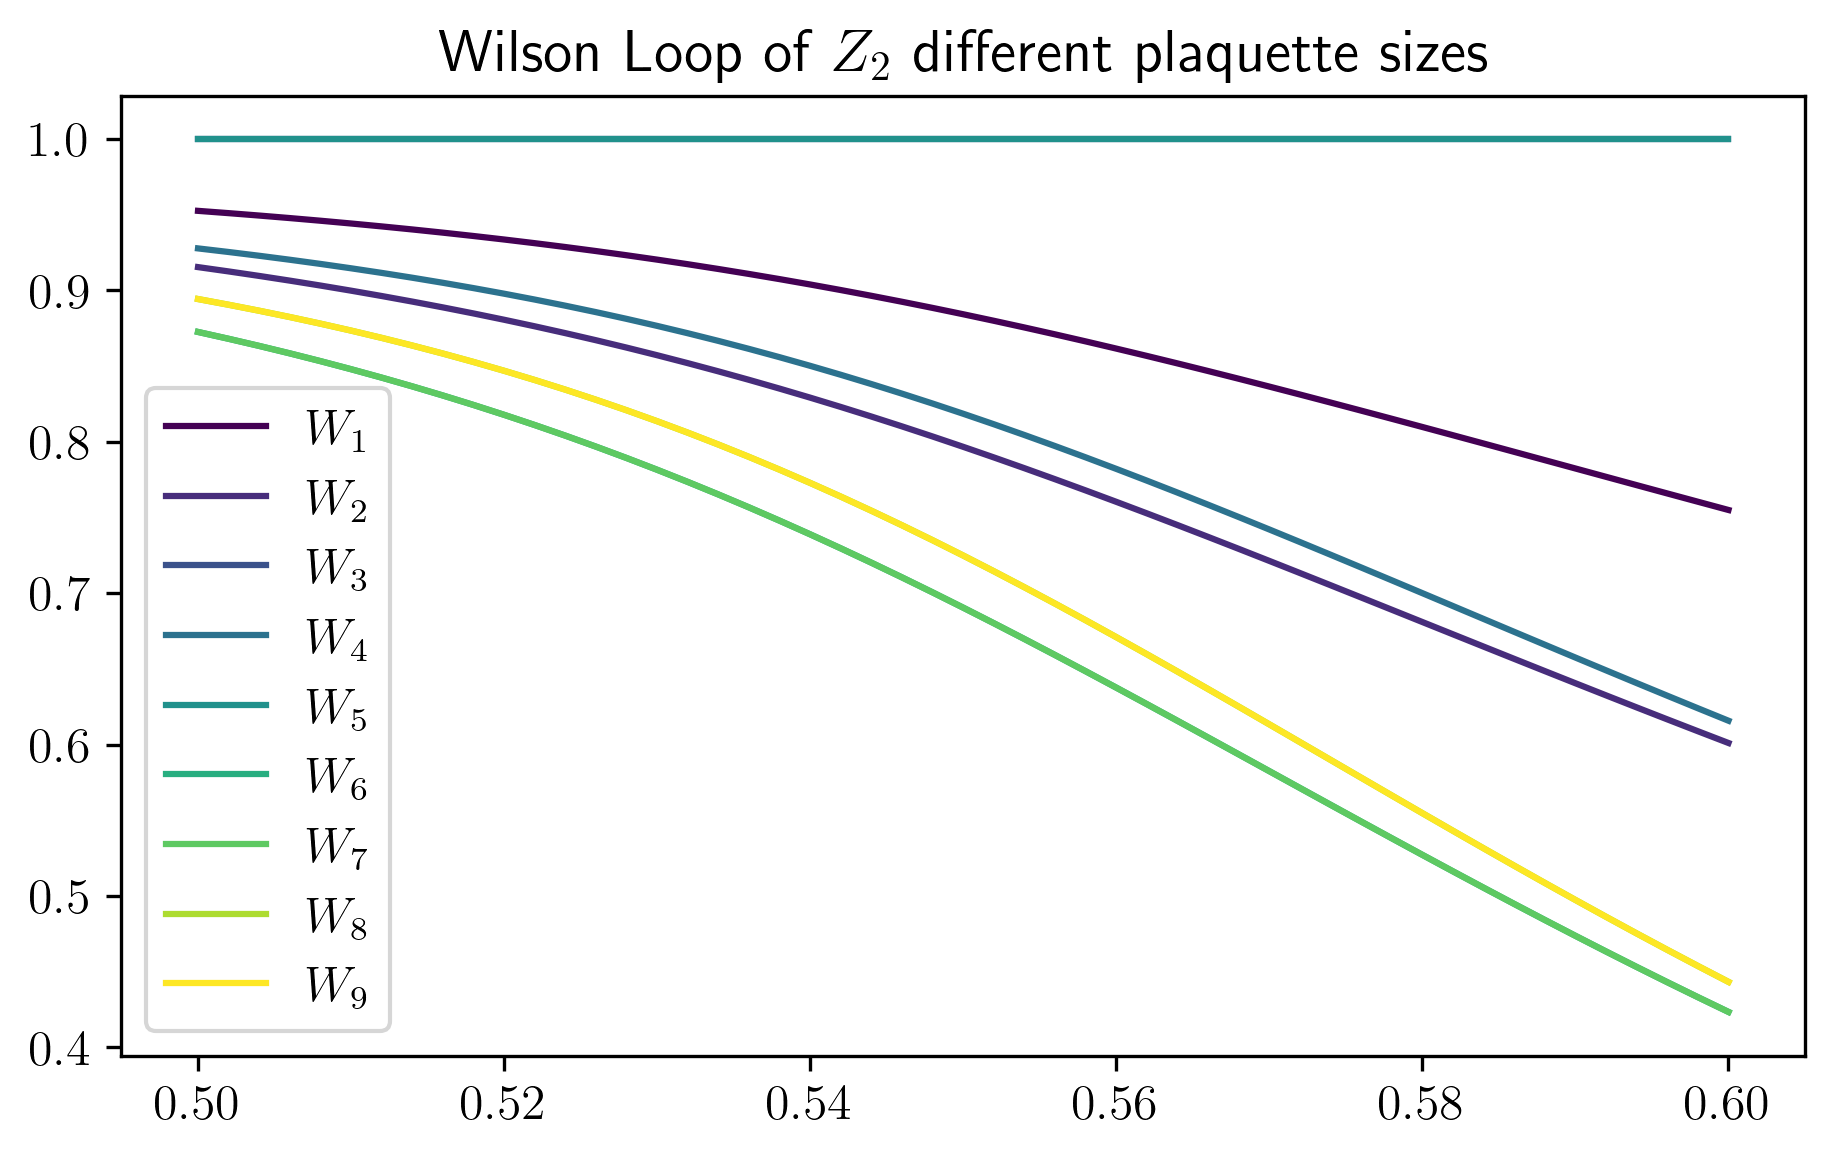

In [56]:
lxs = [[3],[3,3],[3,4],[3,3],[2,3],[2,3],[3,4],[2,3],[3,4]]
lys = [[3],[2,3],[3,3],[3,4],[3,3],[2,3],[2,3],[3,4],[3,4]]
Ls = [7]*len(lxs)
h_i = 0.5
h_f = 0.6
npoints = 51
chis = [128]*len(lxs)
plot_wilson_loop(Ls, chis, h_i, h_f, npoints, lxs, lys)

### Creutz Ratio

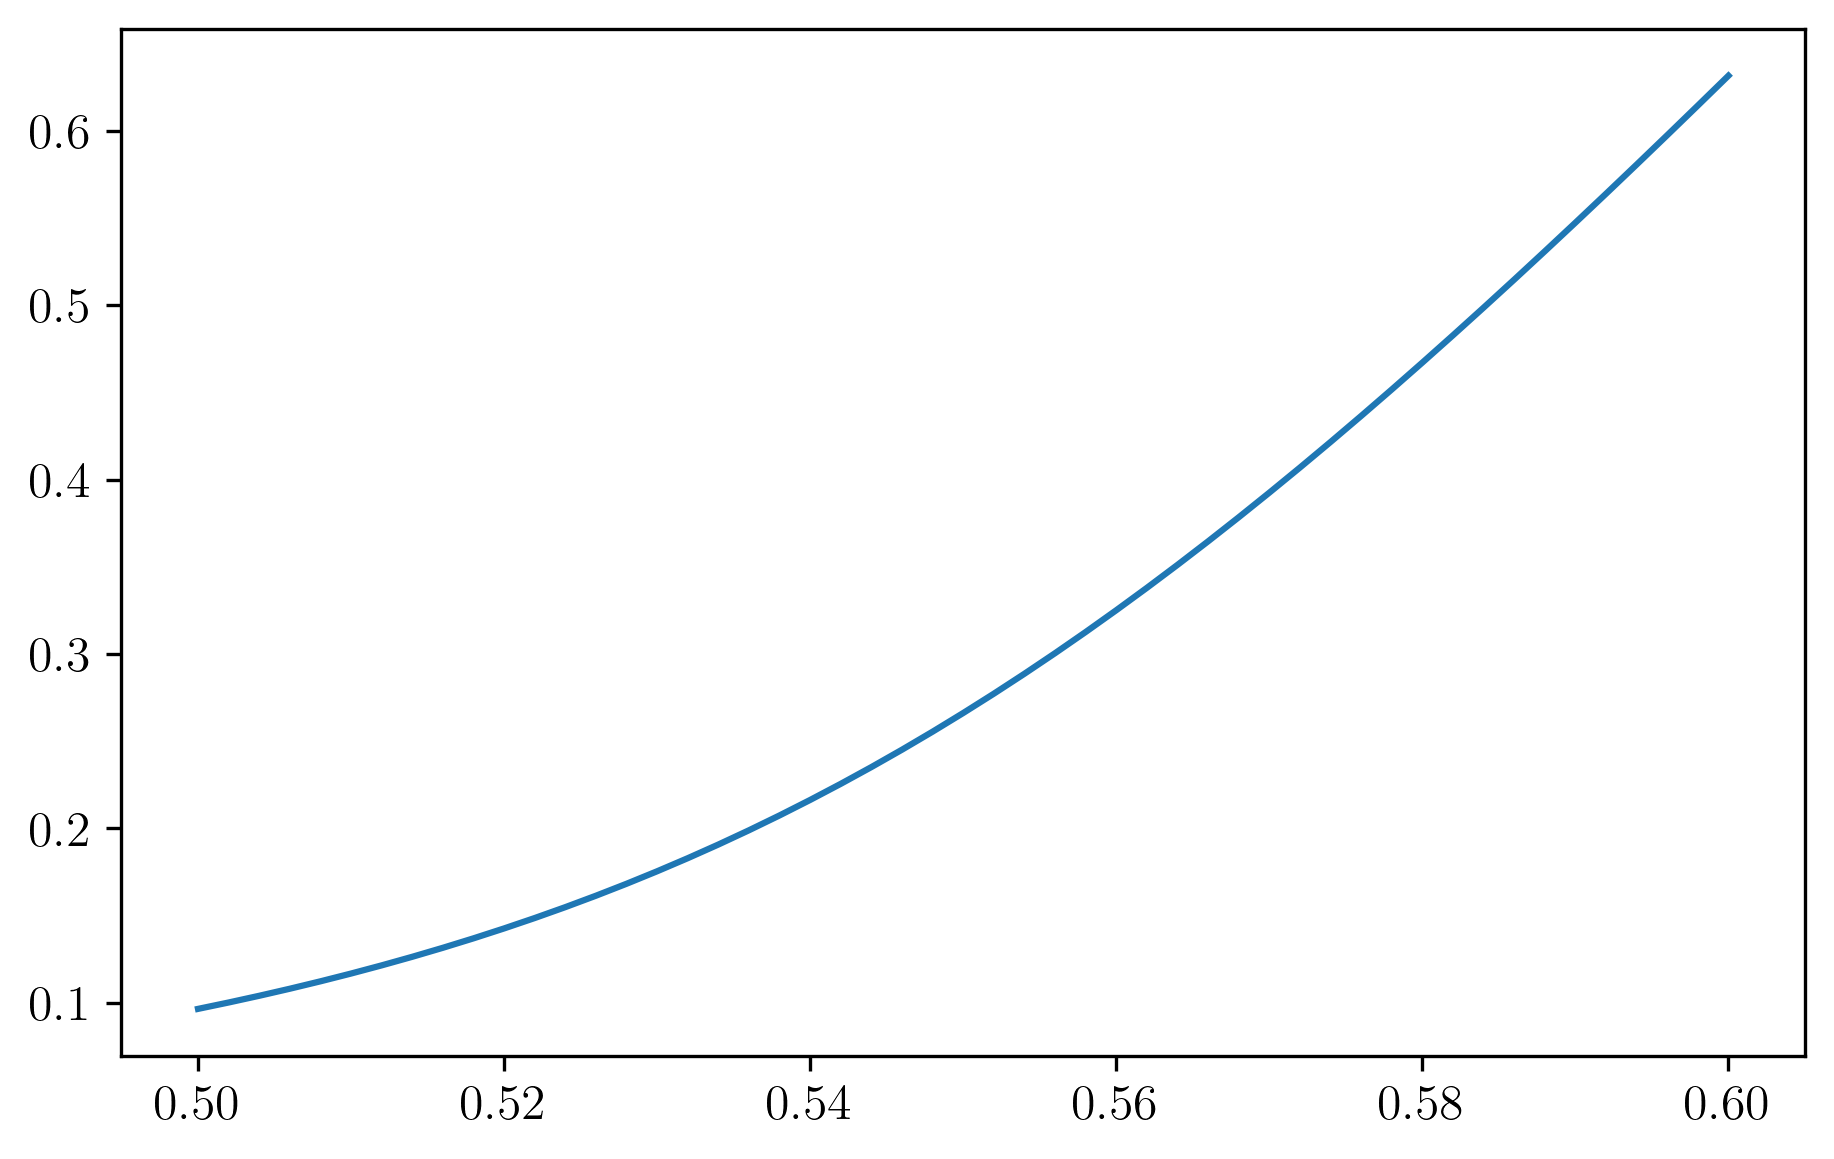

In [57]:
# creutz ratio 1
i = 0
wls = []
for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
    l = L
    loop = np.loadtxt(f"{parent_path}/results/wilson_loops/wilson_loop_first_moment_{lx}-{ly}_Z2_dual_direct_lattice_{l}x{L}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}")
    i += 1
    if i == 1 or i == 2 or i == 3 or i == 7:
        wls.append([loop,i])

hs = np.linspace(h_i,h_f,npoints)
X_1 = -np.log(wls[0][0]*wls[3][0]/(wls[2][0]*wls[1][0]))
plt.plot(hs, X_1)

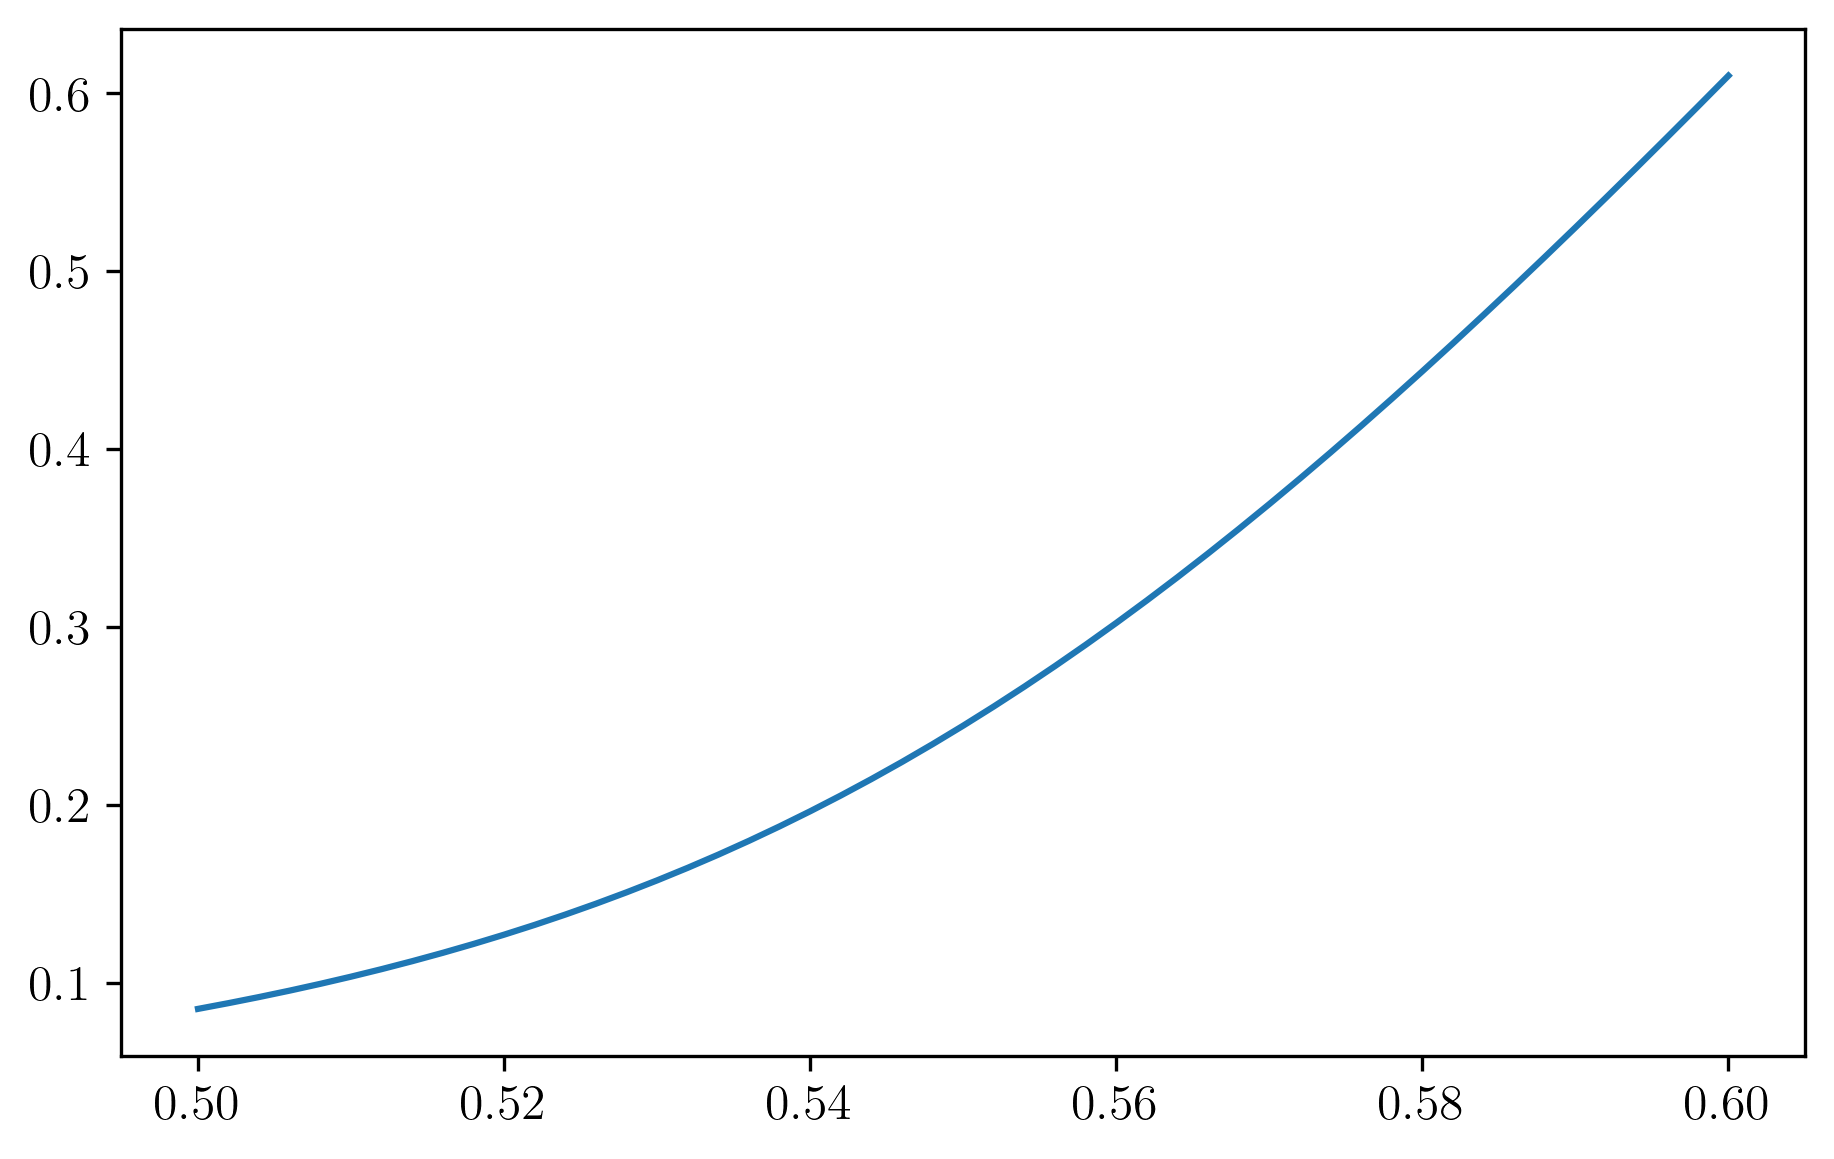

In [58]:
# creutz ratio 2
i = 0
wls = []
for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
    l = L
    loop = np.loadtxt(f"{parent_path}/results/wilson_loops/wilson_loop_first_moment_{lx}-{ly}_Z2_dual_direct_lattice_{l}x{L}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}")
    i += 1
    if i == 1 or i == 3 or i == 4 or i == 9:
        wls.append([loop,i])

hs = np.linspace(h_i,h_f,npoints)
X_2 = -np.log(wls[0][0]*wls[3][0]/(wls[2][0]*wls[1][0]))
plt.plot(hs, X_2)

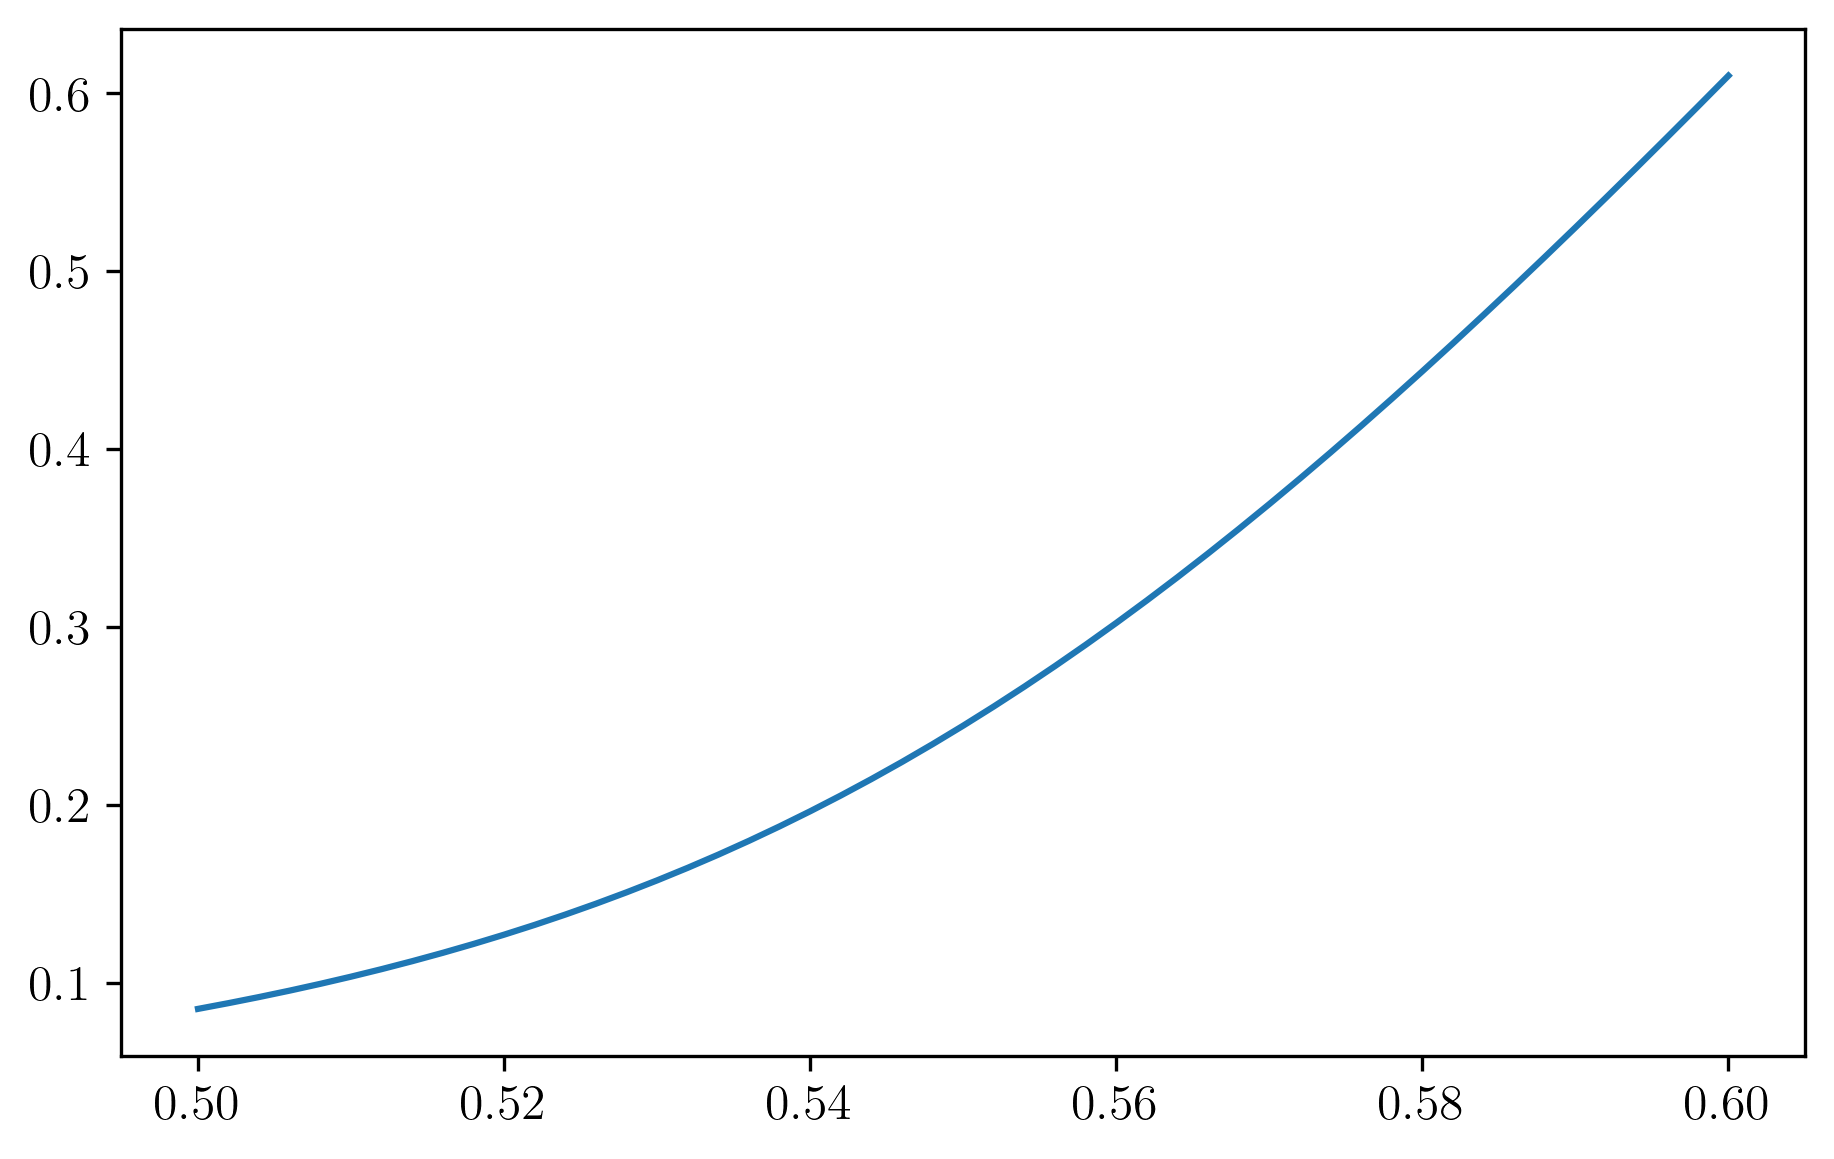

In [59]:
# creutz ratio 3
i = 0
wls = []
for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
    l = L
    loop = np.loadtxt(f"{parent_path}/results/wilson_loops/wilson_loop_first_moment_{lx}-{ly}_Z2_dual_direct_lattice_{l}x{L}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}")
    i += 1
    if i == 1 or i == 4 or i == 5 or i == 8:
        wls.append([loop,i])

hs = np.linspace(h_i,h_f,npoints)
X_3 = -np.log(wls[0][0]*wls[3][0]/(wls[2][0]*wls[1][0]))
plt.plot(hs, X_3)

[0.95262656 0.95110831 0.94951739 0.9478499  0.94610184 0.94426912
 0.9423476  0.9403331  0.93822148 0.93600859 0.93369036 0.93126288
 0.92872236 0.92606523 0.92328821 0.92038829 0.91736289 0.91420979
 0.91092729 0.90751417 0.9039698  0.90029413 0.89648774 0.89255184
 0.88848832 0.88429971 0.87998917 0.8755605  0.87101809 0.86636689
 0.86161232 0.85676027 0.85181702 0.84678915 0.84168349 0.83650705
 0.83126694 0.82597032 0.82062433 0.81523602 0.80981231 0.80435992
 0.79888537 0.79339491 0.7878945  0.78238982 0.77688618 0.77138859
 0.76590173 0.76042991 0.75497713]
[0.91545517 0.91260168 0.90962356 0.90651547 0.90327203 0.89988786
 0.89635764 0.89267614 0.88883826 0.88483914 0.88067409 0.87633885
 0.87182948 0.86714253 0.86227505 0.85722471 0.85198985 0.84656953
 0.84096358 0.8351727  0.82919844 0.82304329 0.81671065 0.81020485
 0.80353115 0.79669572 0.78970558 0.78256856 0.77529323 0.76788882
 0.76036515 0.75273252 0.74500159 0.73718331 0.72928881 0.72132927
 0.71331584 0.70525958 0.69

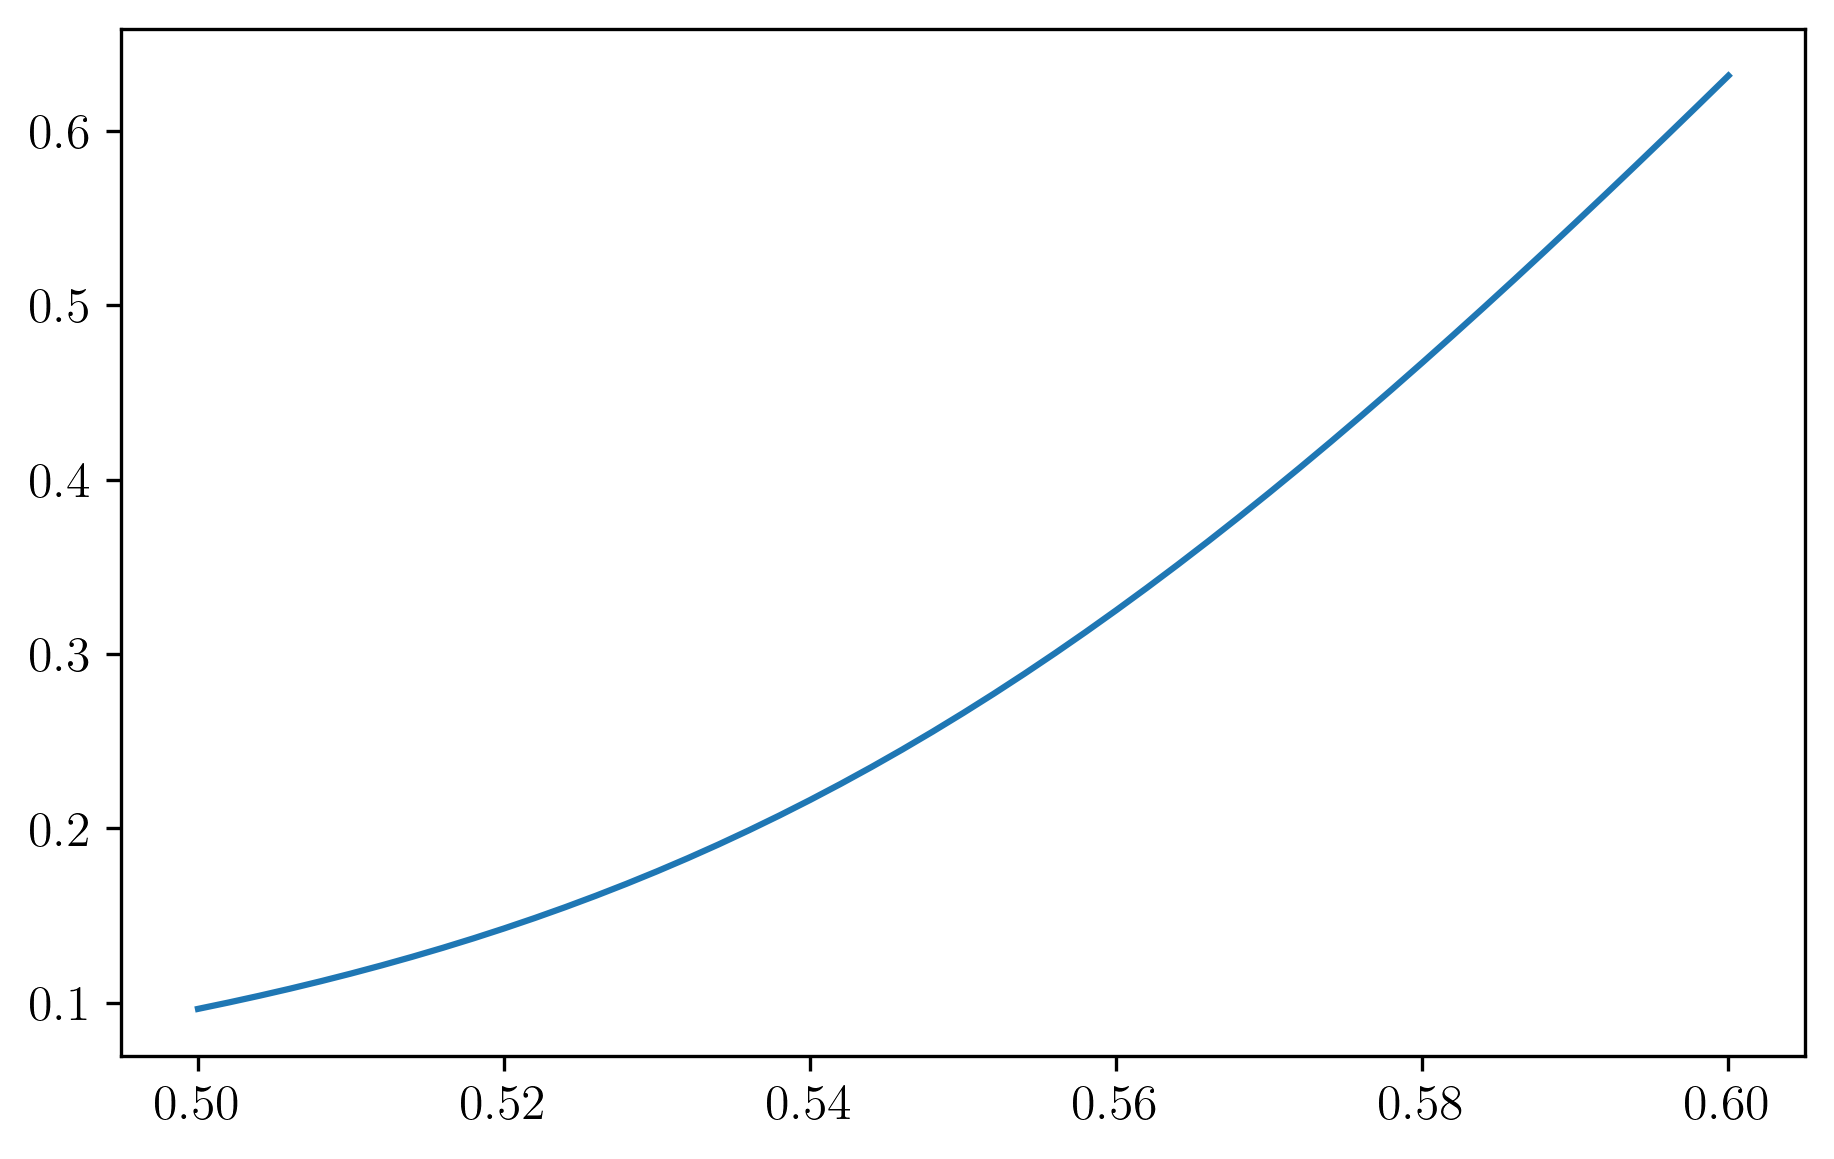

In [60]:
# creutz ratio 4
i = 0
wls = []
for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
    l = L
    loop = np.loadtxt(f"{parent_path}/results/wilson_loops/wilson_loop_first_moment_{lx}-{ly}_Z2_dual_direct_lattice_{l}x{L}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}")
    print(loop)
    i += 1
    if i == 1 or i == 2 or i == 5 or i == 6:
        wls.append([loop,i])

hs = np.linspace(h_i,h_f,npoints)
X_4 = -np.log(wls[0][0]*wls[3][0]/(wls[2][0]*wls[1][0]))
plt.plot(hs, X_4)

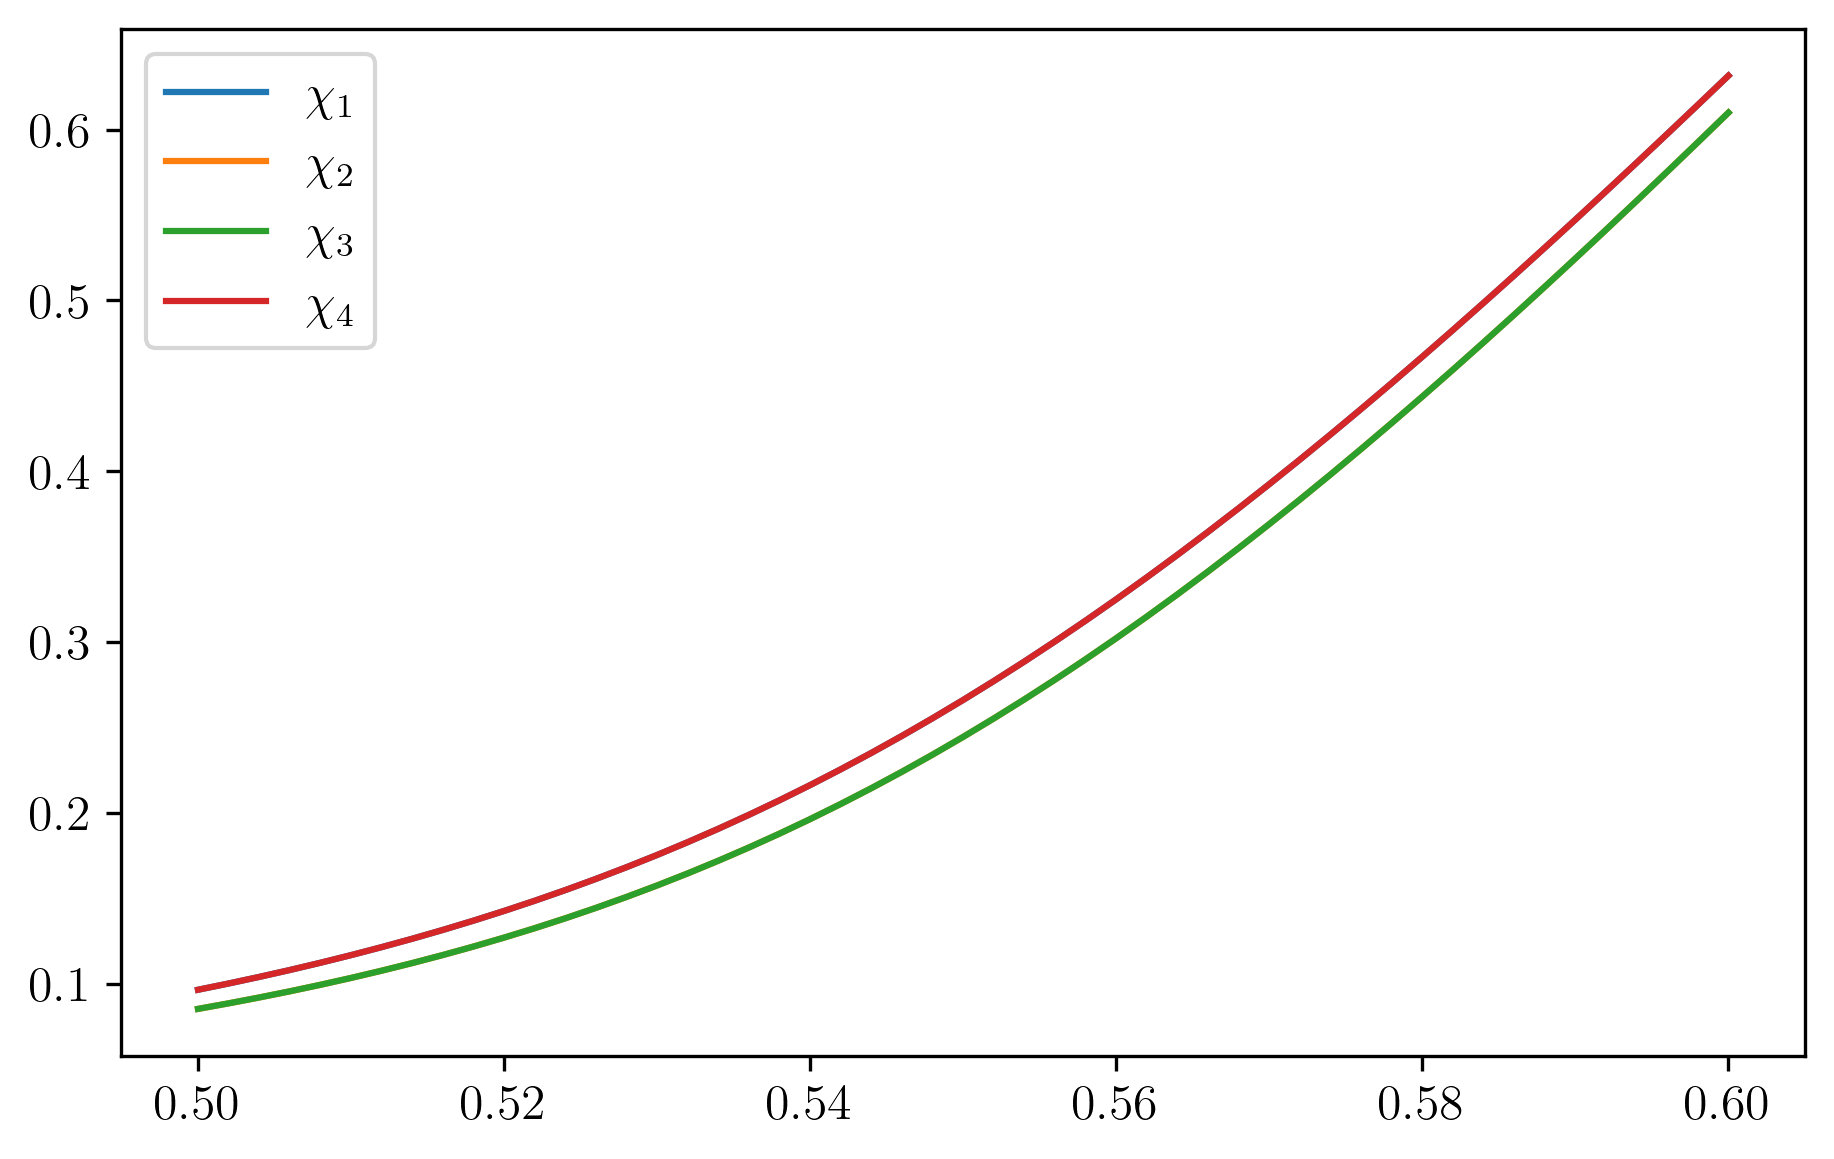

In [61]:
plt.plot(hs, X_1, label="$\chi_1$")
plt.plot(hs, X_2, label="$\chi_2$")
plt.plot(hs, X_3, label="$\chi_3$")
plt.plot(hs, X_4, label="$\chi_4$")
plt.legend()